In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
sns.set()
sns.set_palette(palette='deep')
import folium
from folium.plugins import FastMarkerCluster
import warnings
warnings.filterwarnings("ignore")
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMClassifier

In [ ]:
pip install eli5

In [ ]:
from eli5.sklearn import PermutationImportance
from eli5 import show_weights

In [ ]:
# Abhay File
file = '/content/drive/MyDrive/Smita/Google Drive/Final_smita Capstone/Laptop_EDA_Data_Cleaning_Simple Imputation(1).csv'
social_df = pd.read_csv(file)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
social_df = social_df.drop('preferred_device', axis=1)

In [ ]:
social_df.head()

,Taken_product,Yearly_avg_view_on_travel_page,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,member_in_family,preferred_location_type,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,montly_avg_comment_on_company_page,travelling_network_rating,Daily_Avg_mins_spend_on_traveling_page,Adult_flag_1,working_flag_Yes,following_company_page_Yes
0,0,379.0,9776.0,8,1,10,64.0,5142.0,1,33.0,4,10.0,1,1,0
1,0,255.0,48725.0,3,4,10,59.0,2913.0,1,19.0,3,8.0,0,0,1
2,0,250.0,35184.0,2,2,10,84.0,3074.0,0,23.0,3,8.0,0,0,0
3,0,295.0,7572.0,23,3,10,48.0,9532.0,0,33.0,2,10.0,0,1,0
4,1,250.0,39379.0,16,1,10,80.0,3926.0,1,33.0,2,10.0,0,1,1


In [ ]:
social_df.shape

(1108, 15)

In [ ]:
social_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1108 entries, 0 to 1107
Data columns (total 15 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Taken_product                                 1108 non-null   int64  
 1   Yearly_avg_view_on_travel_page                1108 non-null   float64
 2   total_likes_on_outstation_checkin_given       1108 non-null   float64
 3   yearly_avg_Outstation_checkins                1108 non-null   int64  
 4   member_in_family                              1108 non-null   int64  
 5   preferred_location_type                       1108 non-null   int64  
 6   Yearly_avg_comment_on_travel_page             1108 non-null   float64
 7   total_likes_on_outofstation_checkin_received  1108 non-null   float64
 8   week_since_last_outstation_checkin            1108 non-null   int64  
 9   montly_avg_comment_on_company_page            1108 non-null   f

In [ ]:
X = social_df.drop('Taken_product', axis=1)

y = social_df.pop("Taken_product")

X.head()

,Yearly_avg_view_on_travel_page,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,member_in_family,preferred_location_type,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,montly_avg_comment_on_company_page,travelling_network_rating,Daily_Avg_mins_spend_on_traveling_page,Adult_flag_1,working_flag_Yes,following_company_page_Yes
0,379.0,9776.0,8,1,10,64.0,5142.0,1,33.0,4,10.0,1,1,0
1,255.0,48725.0,3,4,10,59.0,2913.0,1,19.0,3,8.0,0,0,1
2,250.0,35184.0,2,2,10,84.0,3074.0,0,23.0,3,8.0,0,0,0
3,295.0,7572.0,23,3,10,48.0,9532.0,0,33.0,2,10.0,0,1,0
4,250.0,39379.0,16,1,10,80.0,3926.0,1,33.0,2,10.0,0,1,1


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1)

## Base model

##Decision Tree Base Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier

from IPython.display import Image  
#import pydotplus as pydot
from sklearn import tree
from os import system

In [ ]:
# Building a Decision Tree Classifier
dt_model = DecisionTreeClassifier(criterion = 'gini', random_state=1)

In [ ]:
# Fit the model
dt_model.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

Print Feature Importances for DT Model

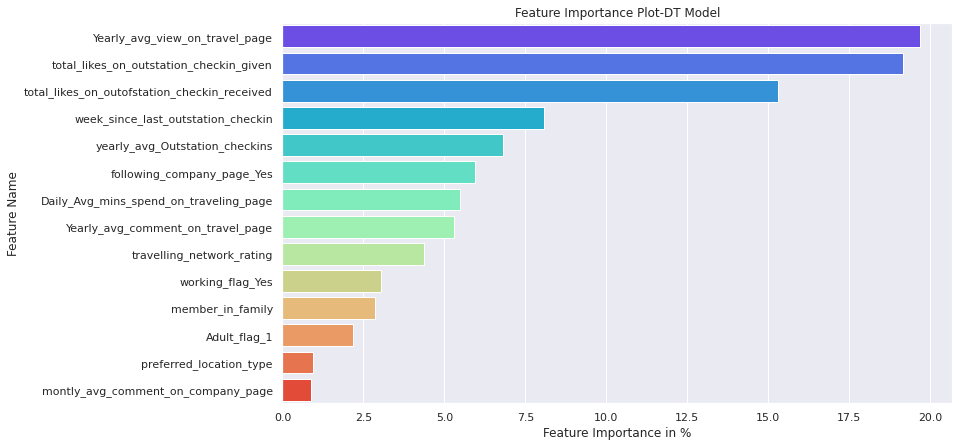

In [ ]:


x=pd.DataFrame(dt_model.feature_importances_*100,index=X_train.columns).sort_values(by=0,ascending=False)
plt.figure(figsize=(12,7))
sns.barplot(x[0],x.index,palette='rainbow')
plt.ylabel('Feature Name')
plt.xlabel('Feature Importance in %')
plt.title('Feature Importance Plot-DT Model')
plt.show()

In [ ]:
# Variable Importance

print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False)*100)

                                                    Imp
Yearly_avg_view_on_travel_page                19.692591
total_likes_on_outstation_checkin_given       19.163852
total_likes_on_outofstation_checkin_received  15.309878
week_since_last_outstation_checkin             8.067250
yearly_avg_Outstation_checkins                 6.803194
following_company_page_Yes                     5.943487
Daily_Avg_mins_spend_on_traveling_page         5.468563
Yearly_avg_comment_on_travel_page              5.283659
travelling_network_rating                      4.358671
working_flag_Yes                               3.029697
member_in_family                               2.873204
Adult_flag_1                                   2.173599
preferred_location_type                        0.936151
montly_avg_comment_on_company_page             0.896204


In [ ]:
perm = PermutationImportance(dt_model, scoring = 'accuracy' ,random_state=101).fit(X_test, y_test)
show_weights(perm, feature_names = list(X_test.columns))

Weight,Feature
0.1814 ± 0.0283,total_likes_on_outofstation_checkin_received
0.1363 ± 0.0210,following_company_page_Yes
0.1231 ± 0.0178,total_likes_on_outstation_checkin_given
0.1027 ± 0.0163,Yearly_avg_view_on_travel_page
0.0541 ± 0.0100,Yearly_avg_comment_on_travel_page
0.0529 ± 0.0223,yearly_avg_Outstation_checkins
0.0408 ± 0.0118,week_since_last_outstation_checkin
0.0246 ± 0.0122,Adult_flag_1
0.0216 ± 0.0070,travelling_network_rating
0.0174 ± 0.0116,Daily_Avg_mins_spend_on_traveling_page


Performing Predictions on Train and Test data with the DT Model

In [ ]:
# Predicting Test Data
y_predict = dt_model.predict(X_test)

In [ ]:
# Predicting train Data
y_predict_train = dt_model.predict(X_train)

Classification report on train data for DT Model

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_auc_score,roc_curve
from sklearn import metrics

1.0


classification on Train data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       594
           1       1.00      1.00      1.00       181

    accuracy                           1.00       775
   macro avg       1.00      1.00      1.00       775
weighted avg       1.00      1.00      1.00       775



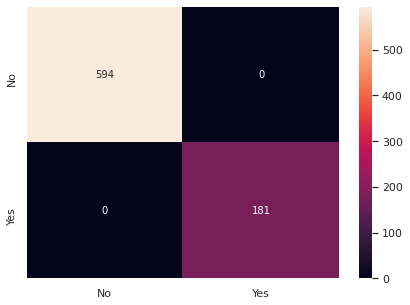

In [ ]:
y_predict = dt_model.predict(X_train)

print(dt_model.score(X_train , y_train))

cm=metrics.confusion_matrix(y_train, y_predict,labels=[0, 1])


df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

print("\n")
print("classification on Train data:")
print(classification_report(y_train,y_predict_train))

0.9579579579579579


classification on Test data:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       238
           1       0.93      0.93      0.93        95

    accuracy                           0.96       333
   macro avg       0.95      0.95      0.95       333
weighted avg       0.96      0.96      0.96       333



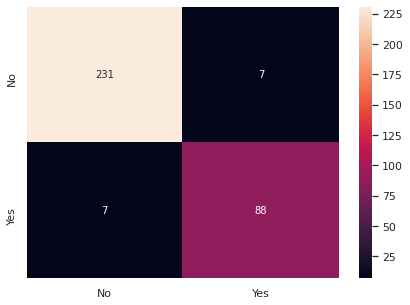

In [ ]:

y_predict = dt_model.predict(X_test)

print(dt_model.score(X_test , y_test))


cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g');
print("\n")
print("classification on Test data:")
print(classification_report(y_test,y_predict))

AUC and ROC for the test data for DT Model

Area Under the Curve is 95.0 %


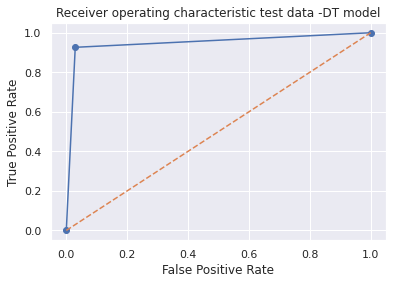

In [ ]:
# Plot ROC_Curve

dt_fpr, dt_tpr,_=roc_curve(y_test,dt_model.predict_proba(X_test)[:,1])
plt.plot(dt_fpr,dt_tpr, marker='o', label='Decision Tree')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic test data -DT model')
print('Area Under the Curve is',round(roc_auc_score(y_test,dt_model.predict_proba(X_test)[:,1]),2)*100,'%')
plt.show()

AUC and ROC for the train data for DT Model

Area Under the Curve is 100.0 %


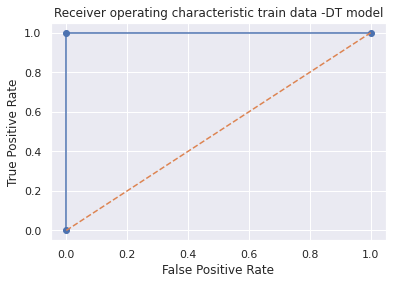

In [ ]:
# Plot ROC_Curve

dt_fpr, dt_tpr,_=roc_curve(y_train,dt_model.predict_proba(X_train)[:,1])
plt.plot(dt_fpr,dt_tpr, marker='o', label='Decision Tree')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic train data -DT model')
print('Area Under the Curve is',round(roc_auc_score(y_train,dt_model.predict_proba(X_train)[:,1]),2)*100,'%')
plt.show()

Confusion Matrix for the training data-DT Model

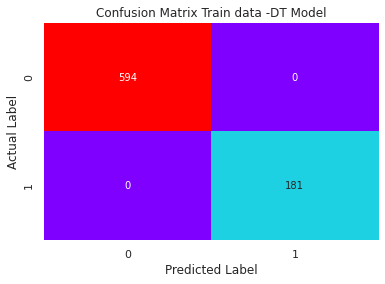

In [ ]:
# Print Confusion Matrix

sns.heatmap(confusion_matrix(y_train,y_predict_train),annot=True, fmt='d', cbar=False,cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix Train data -DT Model')
plt.show()
plt.show()

Confusion Matrix for the test data-DT Model

## Ensemble Learning - Bagging

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_auc_score,roc_curve
import sklearn.metrics as metrics

In [ ]:
bgcl = BaggingClassifier( n_estimators=50,random_state=1)

bgcl = bgcl.fit(X_train, y_train)

Classification report on Bagging Model -Train Set

1.0


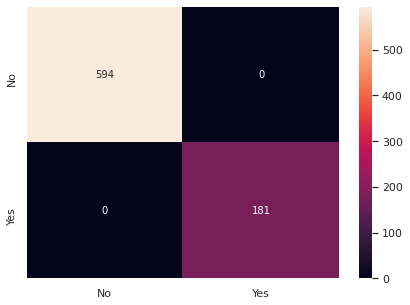

In [ ]:
y_predict = bgcl.predict(X_train)

print(bgcl.score(X_train , y_train))

cm=metrics.confusion_matrix(y_train, y_predict,labels=[0, 1])


df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [ ]:
print(metrics.classification_report(y_train, y_predict,digits=2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       594
           1       1.00      1.00      1.00       181

    accuracy                           1.00       775
   macro avg       1.00      1.00      1.00       775
weighted avg       1.00      1.00      1.00       775



Classification report on Bagging Model -Test Set

0.987987987987988


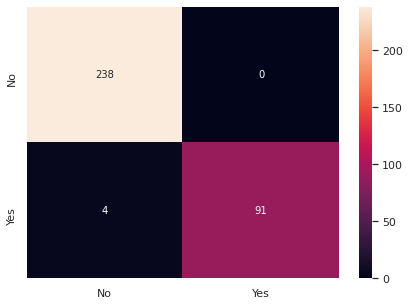

In [ ]:

y_predict = bgcl.predict(X_test)

print(bgcl.score(X_test , y_test))


cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g');

In [ ]:
print(metrics.classification_report(y_test, y_predict,digits=2))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       238
           1       1.00      0.96      0.98        95

    accuracy                           0.99       333
   macro avg       0.99      0.98      0.99       333
weighted avg       0.99      0.99      0.99       333



No handles with labels found to put in legend.


AUC: 1.000


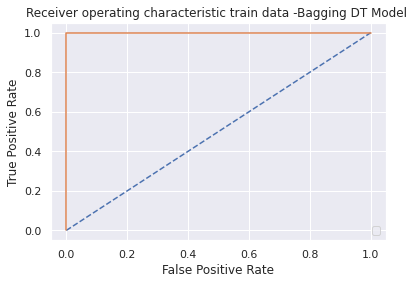

In [ ]:
# predict probabilities
probs = bgcl.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % train_auc)
# calculate roc curve
train_fpr,train_tpr,train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic train data -Bagging DT Model ')
plt.legend(loc="lower right")
plt.savefig('Bagging DT _ROC')

No handles with labels found to put in legend.


AUC: 1.000


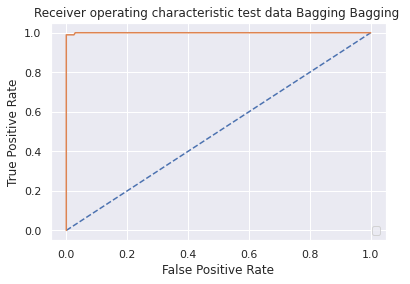

In [ ]:
# predict probabilities
probs = bgcl.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % test_auc)
# calculate roc curve
test_fpr,test_tpr,test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic test data Bagging Bagging ')
plt.legend(loc="lower right")
plt.show()

Feature Importance

In [ ]:
feature_importances = np.mean([
    tree.feature_importances_ for tree in bgcl.estimators_
], axis=0)

In [ ]:

print (pd.DataFrame(feature_importances, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False)*100)

                                                    Imp
Yearly_avg_view_on_travel_page                19.333345
total_likes_on_outofstation_checkin_received  17.757770
total_likes_on_outstation_checkin_given       14.703376
yearly_avg_Outstation_checkins                 8.406327
Yearly_avg_comment_on_travel_page              6.868167
following_company_page_Yes                     5.982138
Daily_Avg_mins_spend_on_traveling_page         5.549752
week_since_last_outstation_checkin             4.180146
preferred_location_type                        4.113676
montly_avg_comment_on_company_page             3.537814
travelling_network_rating                      3.491390
Adult_flag_1                                   2.417444
member_in_family                               2.326043
working_flag_Yes                               1.332615


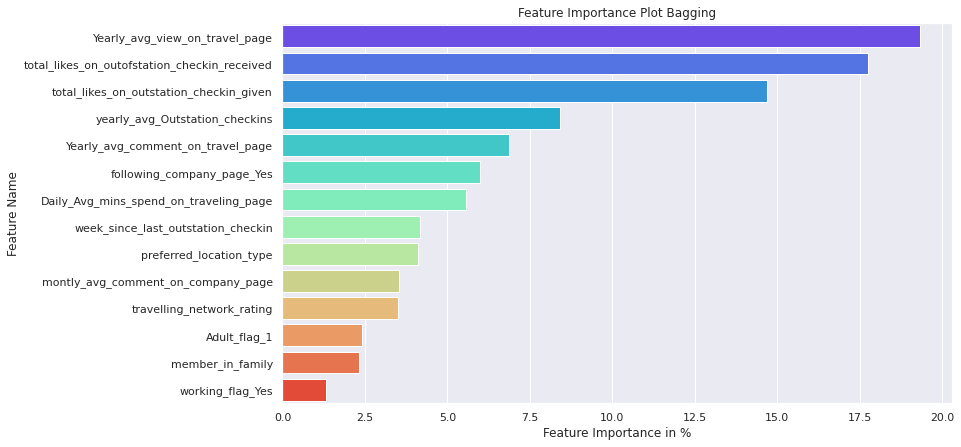

In [ ]:
x=pd.DataFrame(feature_importances*100,index=X_train.columns).sort_values(by=0,ascending=False)
plt.figure(figsize=(12,7))
sns.barplot(x[0],x.index,palette='rainbow')
plt.ylabel('Feature Name')
plt.xlabel('Feature Importance in %')
plt.title('Feature Importance Plot Bagging')
plt.show()

In [ ]:
perm = PermutationImportance(bgcl, scoring = 'accuracy' ,random_state=101).fit(X_test, y_test)
show_weights(perm, feature_names = list(X_test.columns))

Weight,Feature
0.1429 ± 0.0301,total_likes_on_outofstation_checkin_received
0.1315 ± 0.0332,Yearly_avg_view_on_travel_page
0.1045 ± 0.0312,following_company_page_Yes
0.0829 ± 0.0155,total_likes_on_outstation_checkin_given
0.0547 ± 0.0024,yearly_avg_Outstation_checkins
0.0228 ± 0.0081,travelling_network_rating
0.0222 ± 0.0098,Adult_flag_1
0.0174 ± 0.0128,Daily_Avg_mins_spend_on_traveling_page
0.0174 ± 0.0045,week_since_last_outstation_checkin
0.0174 ± 0.0080,preferred_location_type


## Ensemble Learning - AdaBoosting base model DecisionTree

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score 

In [ ]:
abcl = AdaBoostClassifier(n_estimators=1000, random_state=1, base_estimator=DecisionTreeClassifier())
abcl = abcl.fit(X_train, y_train)

Classification report on Adaboosting Model -Train Set

1.0


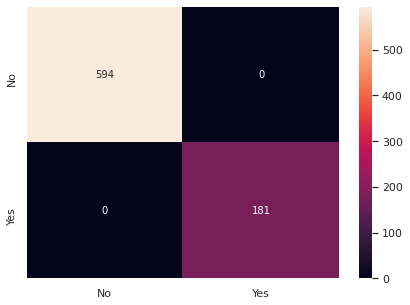

In [ ]:
y_predict = abcl.predict(X_train)
print(abcl.score(X_train, y_train))

cm = metrics.confusion_matrix(y_train, y_predict, labels=[0,1])

df_cm = pd.DataFrame(cm, index=[i for i in ['No','Yes']],
                     columns  = [i for i in ['No', 'Yes']])

plt.figure(figsize=(7,5))

sns.heatmap(df_cm , annot=True,fmt = 'g')

In [ ]:
print(metrics.classification_report(y_train, y_predict, digits=2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       594
           1       1.00      1.00      1.00       181

    accuracy                           1.00       775
   macro avg       1.00      1.00      1.00       775
weighted avg       1.00      1.00      1.00       775



Classification report on Adaboosting Model -Test Set

0.954954954954955


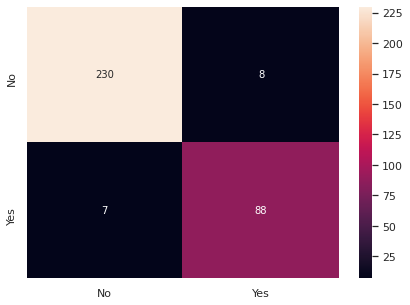

In [ ]:
y_predict = abcl.predict(X_test)
print(abcl.score(X_test, y_test))

cm = metrics.confusion_matrix(y_test, y_predict, labels=[0,1])
df_cm = pd.DataFrame(cm, index=[i for i in ['No', 'Yes']],
                     columns = [i for i in ['No', 'Yes']])

plt.figure(figsize=(7,5))

sns.heatmap(df_cm, annot=True, fmt = 'g');

In [ ]:
print(metrics.classification_report(y_test, y_predict, digits=2))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       238
           1       0.92      0.93      0.92        95

    accuracy                           0.95       333
   macro avg       0.94      0.95      0.94       333
weighted avg       0.96      0.95      0.96       333



AUC and ROC 

No handles with labels found to put in legend.


AUC: 1.000


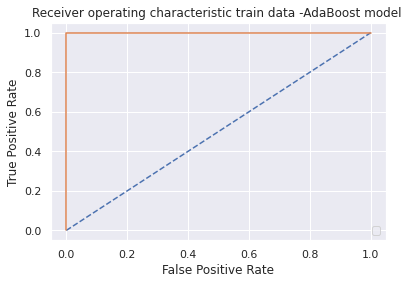

In [ ]:
# predict probabilities
probs = bgcl.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % train_auc)
# calculate roc curve
train_fpr,train_tpr,train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic train data -AdaBoost model ')
plt.legend(loc="lower right")


Area Under the Curve is 95.0 %


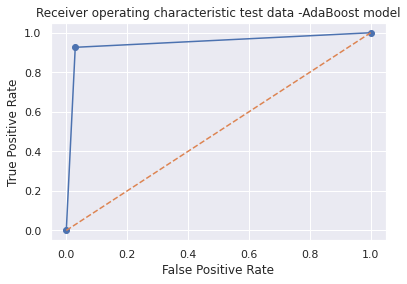

In [ ]:
# Plot ROC_Curve

dt_fpr, dt_tpr,_=roc_curve(y_test,dt_model.predict_proba(X_test)[:,1])
plt.plot(dt_fpr,dt_tpr, marker='o', label='AdaBoost')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic test data -AdaBoost model')
print('Area Under the Curve is',round(roc_auc_score(y_test,dt_model.predict_proba(X_test)[:,1]),2)*100,'%')
plt.show()

Feature Importance

In [ ]:
print (pd.DataFrame(abcl.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False)*100)

                                                    Imp
total_likes_on_outstation_checkin_given       18.640967
Yearly_avg_view_on_travel_page                16.712397
total_likes_on_outofstation_checkin_received  15.678314
Yearly_avg_comment_on_travel_page             10.087466
week_since_last_outstation_checkin             7.860312
following_company_page_Yes                     5.943487
yearly_avg_Outstation_checkins                 5.608954
Daily_Avg_mins_spend_on_traveling_page         4.919355
preferred_location_type                        4.123624
working_flag_Yes                               3.029697
travelling_network_rating                      2.465718
Adult_flag_1                                   2.173599
montly_avg_comment_on_company_page             2.157863
member_in_family                               0.598247


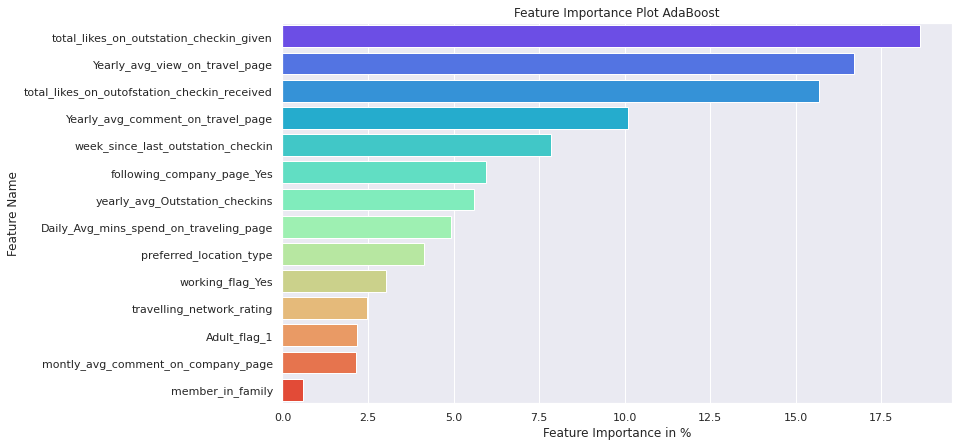

In [ ]:
x=pd.DataFrame(abcl.feature_importances_*100,index=X_train.columns).sort_values(by=0,ascending=False)
plt.figure(figsize=(12,7))
sns.barplot(x[0],x.index,palette='rainbow')
plt.ylabel('Feature Name')
plt.xlabel('Feature Importance in %')
plt.title('Feature Importance Plot AdaBoost')
plt.show()

In [ ]:
perm = PermutationImportance(abcl, scoring = 'accuracy' ,random_state=101).fit(X_test, y_test)
show_weights(perm, feature_names = list(X_test.columns))

Weight,Feature
0.1850 ± 0.0296,total_likes_on_outofstation_checkin_received
0.1453 ± 0.0349,following_company_page_Yes
0.1171 ± 0.0215,Yearly_avg_view_on_travel_page
0.1027 ± 0.0176,total_likes_on_outstation_checkin_given
0.0679 ± 0.0177,Yearly_avg_comment_on_travel_page
0.0523 ± 0.0159,preferred_location_type
0.0444 ± 0.0216,week_since_last_outstation_checkin
0.0312 ± 0.0129,yearly_avg_Outstation_checkins
0.0246 ± 0.0122,Adult_flag_1
0.0192 ± 0.0098,Daily_Avg_mins_spend_on_traveling_page


## Ensemble Learning - AdaBoosting 

In [ ]:
abcl_D = AdaBoostClassifier(n_estimators=1000, random_state=1)
abcl_D = abcl_D.fit(X_train, y_train)

Classification report on Adaboosting Model -Train Set

1.0


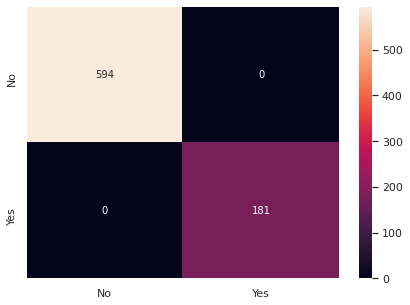

In [ ]:
y_predict = abcl_D.predict(X_train)
print(abcl_D.score(X_train, y_train))

cm = metrics.confusion_matrix(y_train, y_predict, labels=[0,1])

df_cm = pd.DataFrame(cm, index=[i for i in ['No','Yes']],
                     columns  = [i for i in ['No', 'Yes']])

plt.figure(figsize=(7,5))

sns.heatmap(df_cm , annot=True,fmt = 'g')

In [ ]:
print(metrics.classification_report(y_train, y_predict, digits=2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       594
           1       1.00      1.00      1.00       181

    accuracy                           1.00       775
   macro avg       1.00      1.00      1.00       775
weighted avg       1.00      1.00      1.00       775



Classification report on Adaboosting Model -Test Set

0.933933933933934


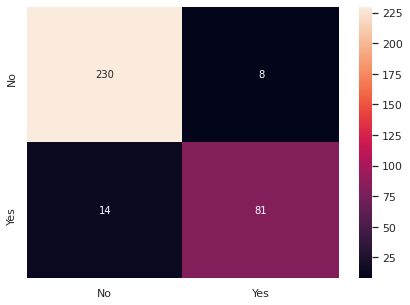

In [ ]:
y_predict = abcl_D.predict(X_test)
print(abcl_D.score(X_test, y_test))

cm = metrics.confusion_matrix(y_test, y_predict, labels=[0,1])
df_cm = pd.DataFrame(cm, index=[i for i in ['No', 'Yes']],
                     columns = [i for i in ['No', 'Yes']])

plt.figure(figsize=(7,5))

sns.heatmap(df_cm, annot=True, fmt = 'g');

In [ ]:
print(metrics.classification_report(y_test, y_predict, digits=2))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95       238
           1       0.91      0.85      0.88        95

    accuracy                           0.93       333
   macro avg       0.93      0.91      0.92       333
weighted avg       0.93      0.93      0.93       333



ROC and AUC

No handles with labels found to put in legend.


AUC: 1.000


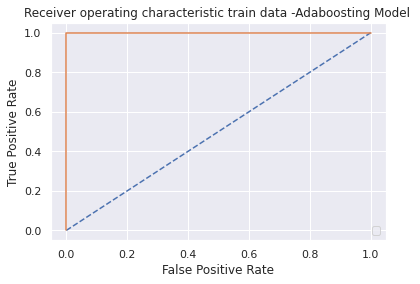

In [ ]:
# predict probabilities
probs = bgcl.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % train_auc)
# calculate roc curve
train_fpr,train_tpr,train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic train data -Adaboosting Model ')
plt.legend(loc="lower right")


AUC: 1.000


No handles with labels found to put in legend.


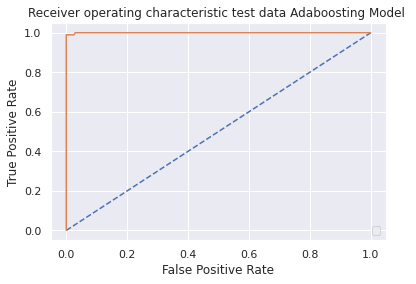

In [ ]:
# predict probabilities
probs = bgcl.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % test_auc)
# calculate roc curve
test_fpr,test_tpr,test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic test data Adaboosting Model ')
plt.legend(loc="lower right")

plt.show()

Feature Importance

In [ ]:
print (pd.DataFrame(abcl_D.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False)*100)

                                               Imp
total_likes_on_outstation_checkin_given       29.4
total_likes_on_outofstation_checkin_received  29.3
Yearly_avg_view_on_travel_page                13.7
yearly_avg_Outstation_checkins                 8.0
Yearly_avg_comment_on_travel_page              3.7
Daily_Avg_mins_spend_on_traveling_page         2.8
preferred_location_type                        2.3
montly_avg_comment_on_company_page             2.3
following_company_page_Yes                     2.0
member_in_family                               1.8
week_since_last_outstation_checkin             1.5
travelling_network_rating                      1.4
Adult_flag_1                                   1.3
working_flag_Yes                               0.5


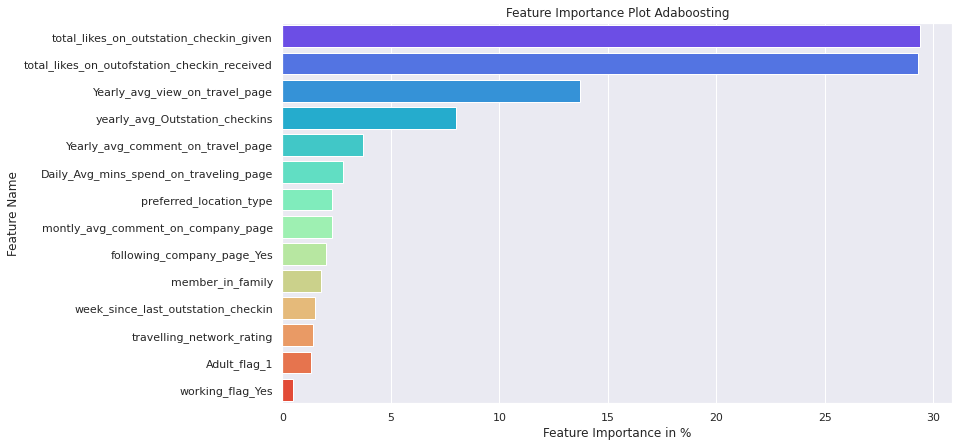

In [ ]:
x=pd.DataFrame(abcl_D.feature_importances_*100,index=X_train.columns).sort_values(by=0,ascending=False)
plt.figure(figsize=(12,7))
sns.barplot(x[0],x.index,palette='rainbow')
plt.ylabel('Feature Name')
plt.xlabel('Feature Importance in %')
plt.title('Feature Importance Plot Adaboosting')
plt.show()

In [ ]:
perm = PermutationImportance(abcl_D, scoring = 'accuracy' ,random_state=101).fit(X_test, y_test)
show_weights(perm, feature_names = list(X_test.columns))

Weight,Feature
0.1159 ± 0.0369,total_likes_on_outofstation_checkin_received
0.1009 ± 0.0210,total_likes_on_outstation_checkin_given
0.0907 ± 0.0209,Yearly_avg_view_on_travel_page
0.0571 ± 0.0225,following_company_page_Yes
0.0264 ± 0.0195,yearly_avg_Outstation_checkins
0.0258 ± 0.0081,preferred_location_type
0.0222 ± 0.0207,Daily_Avg_mins_spend_on_traveling_page
0.0102 ± 0.0140,Adult_flag_1
0.0084 ± 0.0070,week_since_last_outstation_checkin
0.0024 ± 0.0199,member_in_family


## Ensemble Learning - GradientBoost(GBM)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gbcl = GradientBoostingClassifier(n_estimators=1000, random_state=1, max_depth=9)
gbcl = gbcl.fit(X_train, y_train)

1.0


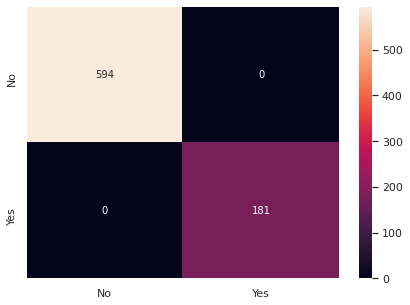

In [ ]:
y_predict = gbcl.predict(X_train)
print(gbcl.score(X_train, y_train))

cm = metrics.confusion_matrix(y_train, y_predict, labels=[0,1])

df_cm = pd.DataFrame(cm, index=[i for i in ['No','Yes']],
                     columns = [i for i in ['No', 'Yes']])

plt.figure(figsize = (7,5))

sns.heatmap(df_cm, annot = True, fmt = 'g')

In [ ]:
print(metrics.classification_report(y_train, y_predict, digits=2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       594
           1       1.00      1.00      1.00       181

    accuracy                           1.00       775
   macro avg       1.00      1.00      1.00       775
weighted avg       1.00      1.00      1.00       775



0.975975975975976


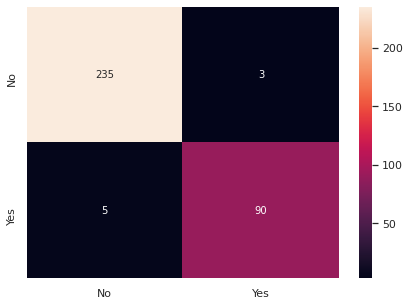

In [ ]:
y_predict = gbcl.predict(X_test)
print(gbcl.score(X_test, y_test))
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [ ]:
print(metrics.classification_report(y_test,y_predict, digits=2))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       238
           1       0.97      0.95      0.96        95

    accuracy                           0.98       333
   macro avg       0.97      0.97      0.97       333
weighted avg       0.98      0.98      0.98       333



AUC And ROC

No handles with labels found to put in legend.


AUC: 1.000


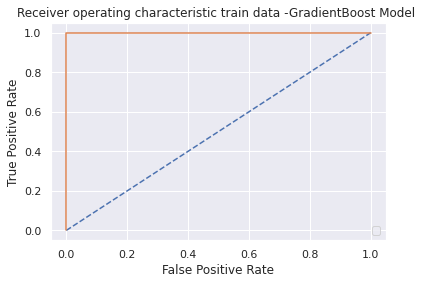

In [ ]:
# predict probabilities
probs = gbcl.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % train_auc)
# calculate roc curve
train_fpr,train_tpr,train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic train data -GradientBoost Model ')
plt.legend(loc="lower right")


No handles with labels found to put in legend.


AUC: 0.999


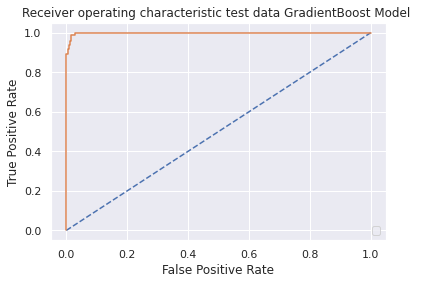

In [ ]:
# predict probabilities
probs = gbcl.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % test_auc)
# calculate roc curve
test_fpr,test_tpr,test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic test data GradientBoost Model ')
plt.legend(loc="lower right")
plt.show()

In [ ]:
feature_importances = np.mean([
    gbcl.feature_importances_ for tree in bgcl.estimators_
], axis=0)

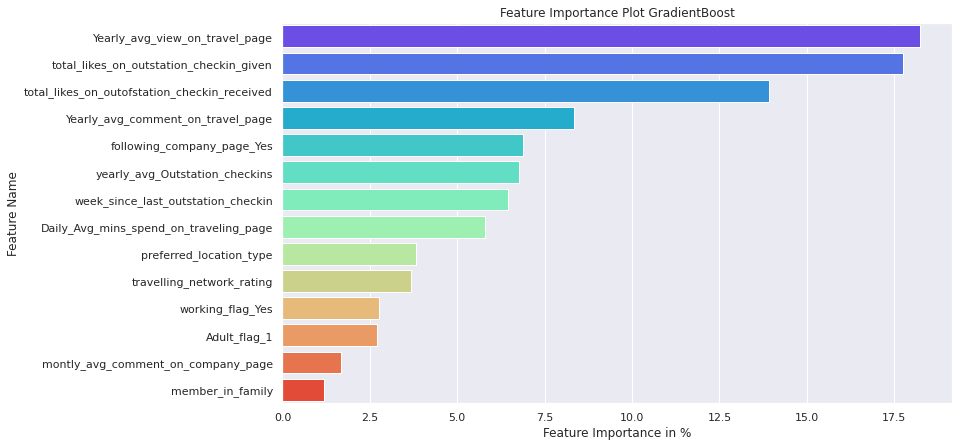

In [ ]:
x=pd.DataFrame(feature_importances*100,index=X_train.columns).sort_values(by=0,ascending=False)
plt.figure(figsize=(12,7))
sns.barplot(x[0],x.index,palette='rainbow')
plt.ylabel('Feature Name')
plt.xlabel('Feature Importance in %')
plt.title('Feature Importance Plot GradientBoost')
plt.show()

In [ ]:
#Permutation Importance
perm = PermutationImportance(gbcl, scoring = 'accuracy' ,random_state=101).fit(X_test, y_test)
show_weights(perm, feature_names = list(X_test.columns))

Weight,Feature
0.1417 ± 0.0272,total_likes_on_outofstation_checkin_received
0.1249 ± 0.0353,Yearly_avg_view_on_travel_page
0.1009 ± 0.0207,following_company_page_Yes
0.0601 ± 0.0054,yearly_avg_Outstation_checkins
0.0583 ± 0.0159,total_likes_on_outstation_checkin_given
0.0258 ± 0.0145,Adult_flag_1
0.0210 ± 0.0066,travelling_network_rating
0.0210 ± 0.0085,Yearly_avg_comment_on_travel_page
0.0138 ± 0.0090,preferred_location_type
0.0138 ± 0.0029,week_since_last_outstation_checkin


## Ensemble RandomForest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfcl = RandomForestClassifier(n_estimators=500, random_state=1)
rfcl = rfcl.fit(X_train,y_train)

1.0


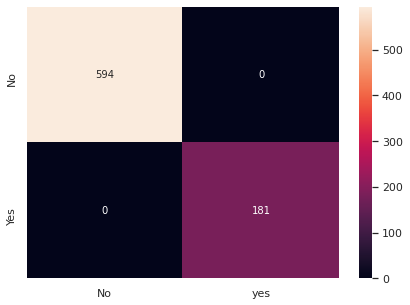

In [ ]:
y_predict = rfcl.predict(X_train)

print(rfcl.score(X_train, y_train))

cm = metrics.confusion_matrix(y_train,y_predict, labels=[0,1])

df_cm = pd.DataFrame(cm, index=[ i for i in ['No', 'Yes']],
                     columns = [i for i in ['No',"yes"]])

plt.figure(figsize=(7,5))
sns.heatmap(df_cm, annot = True, fmt = 'g');

In [ ]:
print(metrics.classification_report(y_train, y_predict, digits=2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       594
           1       1.00      1.00      1.00       181

    accuracy                           1.00       775
   macro avg       1.00      1.00      1.00       775
weighted avg       1.00      1.00      1.00       775



0.975975975975976


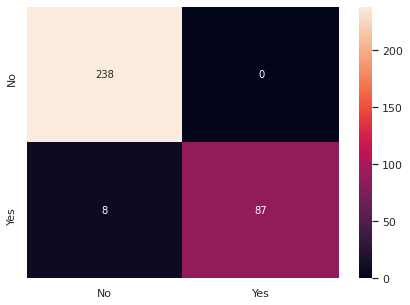

In [ ]:
y_predict = rfcl.predict(X_test)
print(rfcl.score(X_test, y_test))
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [ ]:
print(metrics.classification_report(y_test, y_predict,digits=2))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       238
           1       1.00      0.92      0.96        95

    accuracy                           0.98       333
   macro avg       0.98      0.96      0.97       333
weighted avg       0.98      0.98      0.98       333



No handles with labels found to put in legend.


AUC: 1.000


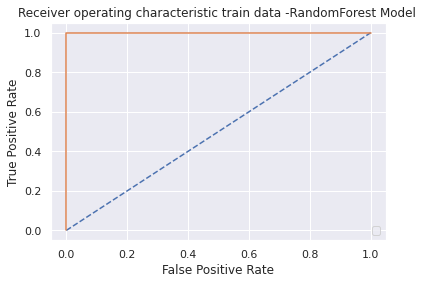

In [ ]:
# predict probabilities
probs = rfcl.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % train_auc)
# calculate roc curve
train_fpr,train_tpr,train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic train data -RandomForest Model ')
plt.legend(loc="lower right")

No handles with labels found to put in legend.


AUC: 1.000


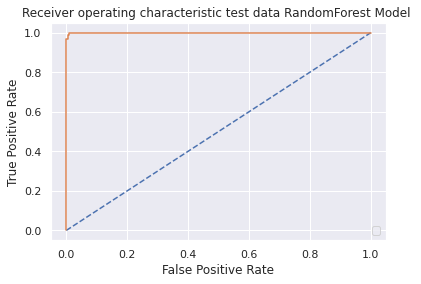

In [ ]:
# predict probabilities
probs = rfcl.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % test_auc)
# calculate roc curve
test_fpr,test_tpr,test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic test data RandomForest Model ')
plt.legend(loc="lower right")
plt.show()

In [ ]:
pd.Series(rfcl.feature_importances_*100, X_train.columns).sort_values(ascending = False)

total_likes_on_outofstation_checkin_received    16.248031
Yearly_avg_view_on_travel_page                  15.426774
total_likes_on_outstation_checkin_given         11.602864
yearly_avg_Outstation_checkins                   9.276347
Daily_Avg_mins_spend_on_traveling_page           7.715612
Yearly_avg_comment_on_travel_page                7.520226
following_company_page_Yes                       5.533481
preferred_location_type                          5.176217
week_since_last_outstation_checkin               4.940150
montly_avg_comment_on_company_page               4.880037
travelling_network_rating                        4.220711
member_in_family                                 3.699750
Adult_flag_1                                     2.504861
working_flag_Yes                                 1.254939
dtype: float64

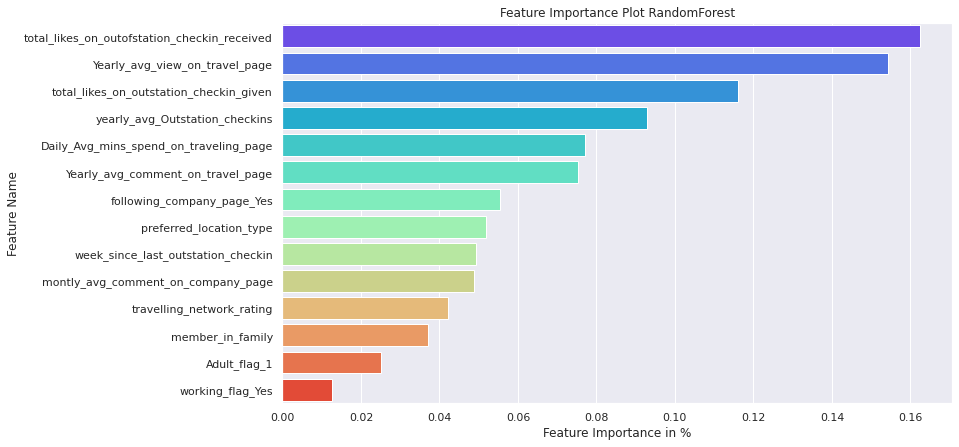

In [ ]:
x=pd.DataFrame(rfcl.feature_importances_,index=X_train.columns).sort_values(by=0,ascending=False)
plt.figure(figsize=(12,7))
sns.barplot(x[0],x.index,palette='rainbow')
plt.ylabel('Feature Name')
plt.xlabel('Feature Importance in %')
plt.title('Feature Importance Plot RandomForest')
plt.show()

In [ ]:
#Permutation Importance
perm = PermutationImportance(rfcl, scoring = 'accuracy' ,random_state=101).fit(X_test, y_test,)
show_weights(perm, feature_names = list(X_test.columns))

Weight,Feature
0.1057 ± 0.0267,total_likes_on_outofstation_checkin_received
0.0835 ± 0.0220,following_company_page_Yes
0.0637 ± 0.0116,Yearly_avg_view_on_travel_page
0.0517 ± 0.0167,total_likes_on_outstation_checkin_given
0.0414 ± 0.0122,yearly_avg_Outstation_checkins
0.0312 ± 0.0081,travelling_network_rating
0.0312 ± 0.0129,preferred_location_type
0.0264 ± 0.0167,Adult_flag_1
0.0168 ± 0.0061,week_since_last_outstation_checkin
0.0144 ± 0.0070,member_in_family


## LightGBM Model

In [ ]:
from lightgbm import LGBMClassifier

In [ ]:
lgbm = LGBMClassifier()
lgbm = lgbm.fit(X_train, y_train)

1.0


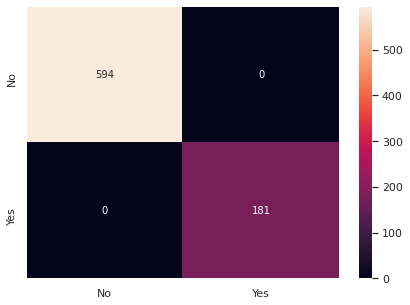

In [ ]:
y_predict = lgbm.predict(X_train)
print(lgbm.score(X_train,y_train))

cm = metrics.confusion_matrix(y_train, y_predict, labels=[0,1])

df_cm = pd.DataFrame(cm, index= [i for i in ['No','Yes']],
                     columns = [i for i in ['No','Yes']])

plt.figure(figsize = (7,5))

sns.heatmap(df_cm, annot=True, fmt = 'g');

In [ ]:
print(metrics,classification_report(y_train, y_predict, digits=2))

<module 'sklearn.metrics' from '/usr/local/lib/python3.7/dist-packages/sklearn/metrics/__init__.py'>               precision    recall  f1-score   support

           0       1.00      1.00      1.00       594
           1       1.00      1.00      1.00       181

    accuracy                           1.00       775
   macro avg       1.00      1.00      1.00       775
weighted avg       1.00      1.00      1.00       775



0.993993993993994


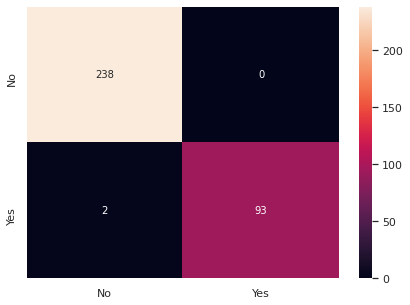

In [ ]:
y_predict = lgbm .predict(X_test)
print(lgbm .score(X_test, y_test))
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [ ]:
print(metrics.classification_report(y_test, y_predict,digits=2))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       238
           1       1.00      0.98      0.99        95

    accuracy                           0.99       333
   macro avg       1.00      0.99      0.99       333
weighted avg       0.99      0.99      0.99       333



AUC and ROC

No handles with labels found to put in legend.


AUC: 1.000


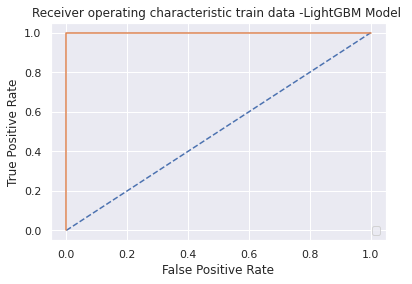

In [ ]:
# predict probabilities
probs = lgbm.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % train_auc)
# calculate roc curve
train_fpr,train_tpr,train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic train data -LightGBM Model ')
plt.legend(loc="lower right")

No handles with labels found to put in legend.


AUC: 1.000


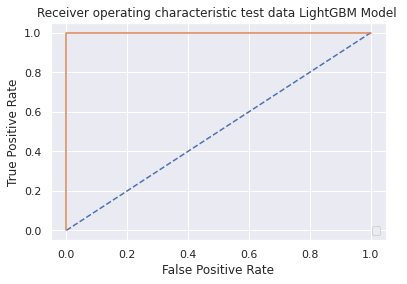

In [ ]:
# predict probabilities
probs = lgbm.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % test_auc)
# calculate roc curve
test_fpr,test_tpr,test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic test data LightGBM Model ')
plt.legend(loc="lower right")
plt.show()

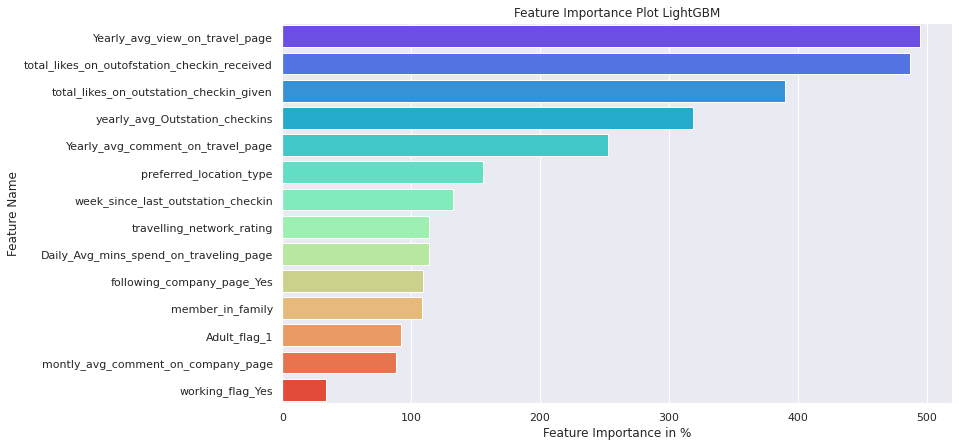

In [ ]:
x=pd.DataFrame(lgbm.feature_importances_,index=X_train.columns).sort_values(by=0,ascending=False)
plt.figure(figsize=(12,7))
sns.barplot(x[0],x.index,palette='rainbow')
plt.ylabel('Feature Name')
plt.xlabel('Feature Importance in %')
plt.title('Feature Importance Plot LightGBM')
plt.show()

In [ ]:
pd.DataFrame(lgbm.feature_importances_,index=X_train.columns).sort_values(by=0,ascending=False)

,0
Yearly_avg_view_on_travel_page,495
total_likes_on_outofstation_checkin_received,487
total_likes_on_outstation_checkin_given,390
yearly_avg_Outstation_checkins,319
Yearly_avg_comment_on_travel_page,253
preferred_location_type,156
week_since_last_outstation_checkin,132
travelling_network_rating,114
Daily_Avg_mins_spend_on_traveling_page,114
following_company_page_Yes,109


In [ ]:
#Permutation Importance
perm = PermutationImportance(lgbm, scoring = 'accuracy' ,random_state=101).fit(X_test, y_test,)
show_weights(perm, feature_names = list(X_test.columns))

Weight,Feature
0.1153 ± 0.0254,Yearly_avg_view_on_travel_page
0.1129 ± 0.0396,total_likes_on_outofstation_checkin_received
0.0967 ± 0.0158,following_company_page_Yes
0.0571 ± 0.0100,total_likes_on_outstation_checkin_given
0.0324 ± 0.0116,yearly_avg_Outstation_checkins
0.0318 ± 0.0124,travelling_network_rating
0.0276 ± 0.0116,Adult_flag_1
0.0180 ± 0.0093,preferred_location_type
0.0090 ± 0.0100,member_in_family
0.0060 ± 0.0038,week_since_last_outstation_checkin


## CatBoost Ensemble Model

In [ ]:
pip install catboost

     |████████████████████████████████| 69.2MB 43kB/s 


In [ ]:
from catboost import CatBoostClassifier

In [ ]:
catboost = CatBoostClassifier()
catboost = catboost.fit(X_train, y_train)

Learning rate set to 0.00924
0:	learn: 0.6857659	total: 50.1ms	remaining: 50s
1:	learn: 0.6807675	total: 52.2ms	remaining: 26s
2:	learn: 0.6743403	total: 54.2ms	remaining: 18s
3:	learn: 0.6677641	total: 56.2ms	remaining: 14s
4:	learn: 0.6619391	total: 58.3ms	remaining: 11.6s
5:	learn: 0.6558419	total: 60.3ms	remaining: 9.98s
6:	learn: 0.6499748	total: 62.2ms	remaining: 8.82s
7:	learn: 0.6436831	total: 64.1ms	remaining: 7.95s
8:	learn: 0.6384276	total: 65.9ms	remaining: 7.26s
9:	learn: 0.6342027	total: 67.2ms	remaining: 6.65s
10:	learn: 0.6277364	total: 69ms	remaining: 6.2s
11:	learn: 0.6233158	total: 70.9ms	remaining: 5.84s
12:	learn: 0.6180035	total: 72.8ms	remaining: 5.53s
13:	learn: 0.6135718	total: 76.7ms	remaining: 5.4s
14:	learn: 0.6082744	total: 79.4ms	remaining: 5.22s
15:	learn: 0.6039235	total: 83.5ms	remaining: 5.13s
16:	learn: 0.6003407	total: 85.8ms	remaining: 4.96s
17:	learn: 0.5952842	total: 87.7ms	remaining: 4.79s
18:	learn: 0.5894235	total: 89.7ms	remaining: 4.63s
19:	l

1.0


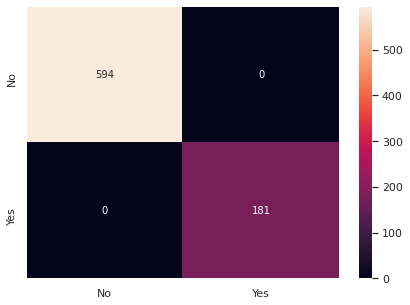

In [ ]:
y_predict = catboost.predict(X_train)
print(catboost.score(X_train, y_train))
cm=metrics.confusion_matrix(y_train, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [ ]:
print(metrics.classification_report(y_train, y_predict,digits=2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       594
           1       1.00      1.00      1.00       181

    accuracy                           1.00       775
   macro avg       1.00      1.00      1.00       775
weighted avg       1.00      1.00      1.00       775



0.984984984984985


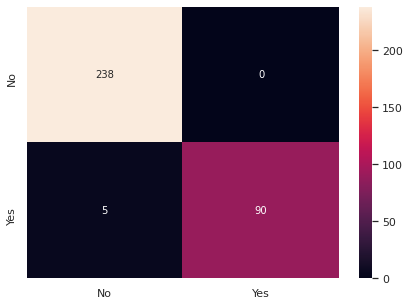

In [ ]:
y_predict = catboost.predict(X_test)
print(catboost.score(X_test, y_test))
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [ ]:
print(metrics.classification_report(y_test, y_predict,digits=2))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       238
           1       1.00      0.95      0.97        95

    accuracy                           0.98       333
   macro avg       0.99      0.97      0.98       333
weighted avg       0.99      0.98      0.98       333



AUC and ROC

No handles with labels found to put in legend.


AUC: 1.000


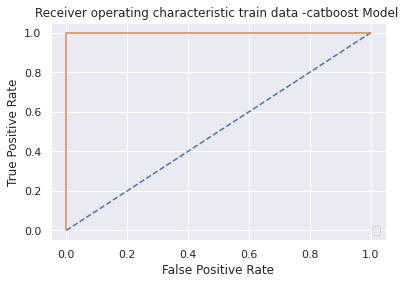

In [ ]:
# predict probabilities
probs = catboost.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % train_auc)
# calculate roc curve
train_fpr,train_tpr,train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic train data -catboost Model ')
plt.legend(loc="lower right")


No handles with labels found to put in legend.


AUC: 1.000


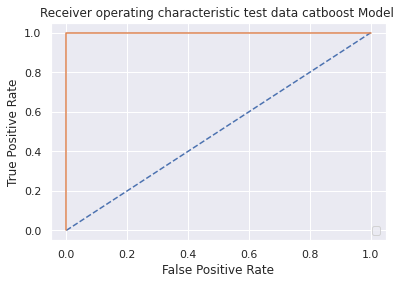

In [ ]:
# predict probabilities
probs = catboost.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % test_auc)
# calculate roc curve
test_fpr,test_tpr,test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic test data catboost Model ')
plt.legend(loc="lower right")
plt.show()

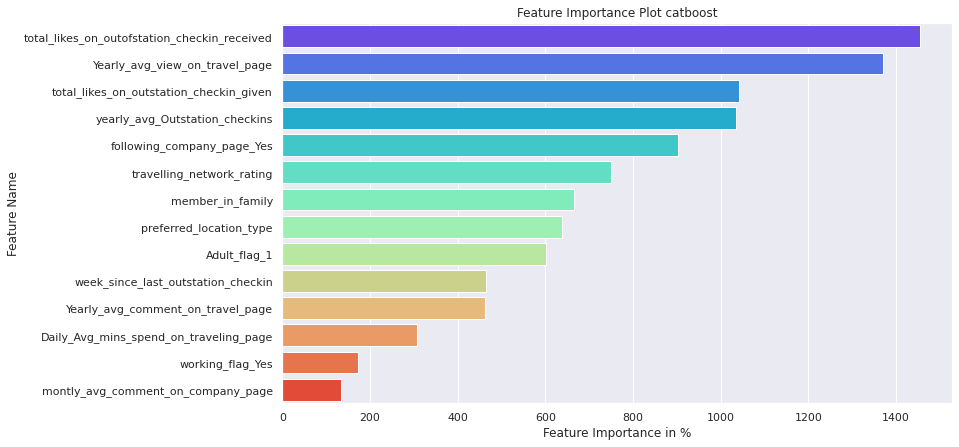

In [ ]:
x=pd.DataFrame(catboost.feature_importances_*100,index=X_train.columns).sort_values(by=0,ascending=False)
plt.figure(figsize=(12,7))
sns.barplot(x[0],x.index,palette='rainbow')
plt.ylabel('Feature Name')
plt.xlabel('Feature Importance in %')
plt.title('Feature Importance Plot catboost')
plt.show()

In [ ]:
#Permutation Importance
perm = PermutationImportance(catboost, scoring = 'accuracy' ,random_state=101).fit(X_test, y_test,)
show_weights(perm, feature_names = list(X_test.columns))

Weight,Feature
0.0949 ± 0.0172,total_likes_on_outofstation_checkin_received
0.0763 ± 0.0217,following_company_page_Yes
0.0745 ± 0.0191,Yearly_avg_view_on_travel_page
0.0577 ± 0.0262,total_likes_on_outstation_checkin_given
0.0498 ± 0.0159,travelling_network_rating
0.0444 ± 0.0176,yearly_avg_Outstation_checkins
0.0384 ± 0.0154,Adult_flag_1
0.0282 ± 0.0090,preferred_location_type
0.0228 ± 0.0081,member_in_family
0.0162 ± 0.0081,week_since_last_outstation_checkin


## Extreme Gradient Boosting Machine (XG-BOOST)

In [ ]:
import xgboost as xgb

In [ ]:
clfXGB=xgb.XGBClassifier()
clfXGB.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

0.9690322580645161


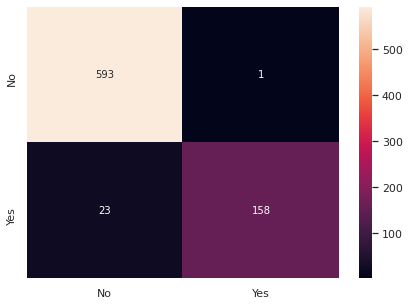

In [ ]:
y_predict = clfXGB.predict(X_train)
print(clfXGB.score(X_train, y_train))
cm=metrics.confusion_matrix(y_train, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [ ]:
y_pred=clfXGB.predict(X_train)
model_scoreXGB=clfXGB.score(X_train,y_train)
print(model_scoreXGB)
print(metrics.confusion_matrix(y_train,y_pred))
print(metrics.classification_report(y_train, y_pred))

0.9690322580645161
[[593   1]
 [ 23 158]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       594
           1       0.99      0.87      0.93       181

    accuracy                           0.97       775
   macro avg       0.98      0.94      0.95       775
weighted avg       0.97      0.97      0.97       775



0.93993993993994


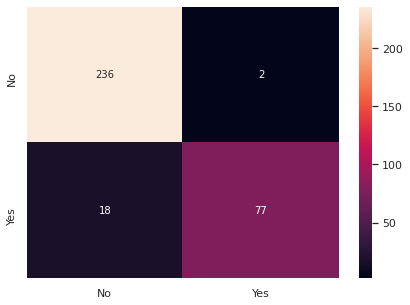

In [ ]:
y_predict = clfXGB.predict(X_test)
print(clfXGB.score(X_test, y_test))
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [ ]:
#clfXGB=xgb.XGBClassifier(n_estimators=1000,learning_rate=0.01, max_depth=9 )
#clfXGB.fit(X_train, y_train)
y_pred=clfXGB.predict(X_test)
model_scoreXGB=clfXGB.score(X_test,y_test)
print(model_scoreXGB)
print(metrics.confusion_matrix(y_test,y_pred))
print(metrics.classification_report(y_test, y_pred))

0.93993993993994
[[236   2]
 [ 18  77]]
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       238
           1       0.97      0.81      0.89        95

    accuracy                           0.94       333
   macro avg       0.95      0.90      0.92       333
weighted avg       0.94      0.94      0.94       333



No handles with labels found to put in legend.


AUC: 0.996


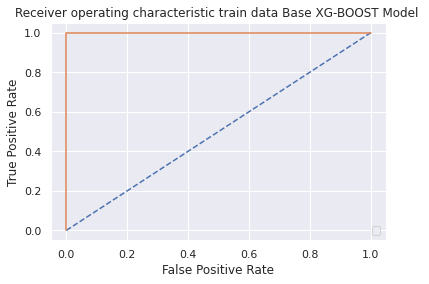

In [ ]:
# predict probabilities
probs = clfXGB.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % train_auc)
# calculate roc curve
train_fpr,train_tpr,train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic train data Base XG-BOOST Model ')
plt.legend(loc="lower right")
plt.show()

No handles with labels found to put in legend.


AUC: 0.982


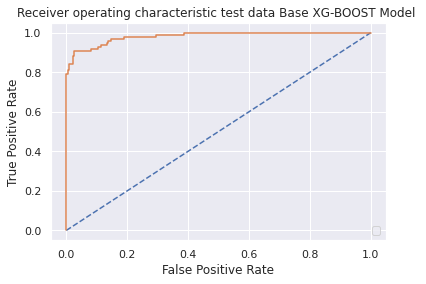

In [ ]:
# predict probabilities
probs = clfXGB.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % test_auc)
# calculate roc curve
test_fpr,test_tpr,test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic test data Base XG-BOOST Model ')
plt.legend(loc="lower right")
plt.show()

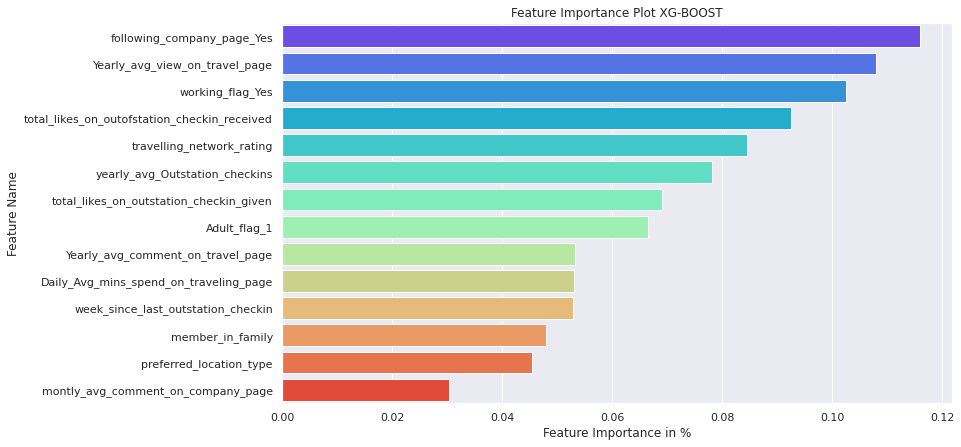

In [ ]:
x=pd.DataFrame(clfXGB.feature_importances_,index=X_train.columns).sort_values(by=0,ascending=False)
plt.figure(figsize=(12,7))
sns.barplot(x[0],x.index,palette='rainbow')
plt.ylabel('Feature Name')
plt.xlabel('Feature Importance in %')
plt.title('Feature Importance Plot XG-BOOST')
plt.show()

XG boost After hyperparameter Tune model 1

In [ ]:
clfXGB=xgb.XGBClassifier(n_estimators=500,learning_rate=0.01,max_depth=5)
clfXGB.fit(X_train, y_train)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.01, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

0.9922580645161291


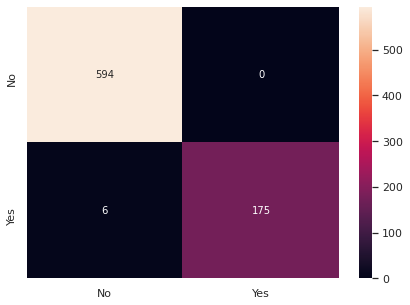

In [ ]:
y_predict = clfXGB.predict(X_train)
print(clfXGB.score(X_train, y_train))
cm=metrics.confusion_matrix(y_train, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [ ]:
y_pred=clfXGB.predict(X_train)
model_scoreXGB=clfXGB.score(X_train,y_train)
print(model_scoreXGB)
print(metrics.confusion_matrix(y_train,y_pred))
print(metrics.classification_report(y_train, y_pred))

0.9922580645161291
[[594   0]
 [  6 175]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       594
           1       1.00      0.97      0.98       181

    accuracy                           0.99       775
   macro avg       0.99      0.98      0.99       775
weighted avg       0.99      0.99      0.99       775



0.96996996996997


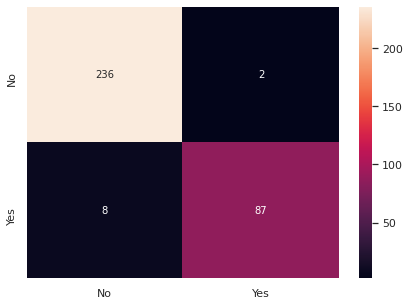

In [ ]:
y_predict = clfXGB.predict(X_test)
print(clfXGB.score(X_test, y_test))
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [ ]:
#clfXGB=xgb.XGBClassifier(n_estimators=1000,learning_rate=0.01, max_depth=9 )
#clfXGB.fit(X_train, y_train)
y_pred=clfXGB.predict(X_test)
model_scoreXGB=clfXGB.score(X_test,y_test)
print(model_scoreXGB)
print(metrics.confusion_matrix(y_test,y_pred))
print(metrics.classification_report(y_test, y_pred))

0.96996996996997
[[236   2]
 [  8  87]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       238
           1       0.98      0.92      0.95        95

    accuracy                           0.97       333
   macro avg       0.97      0.95      0.96       333
weighted avg       0.97      0.97      0.97       333



AUC and ROC

No handles with labels found to put in legend.


AUC: 1.000


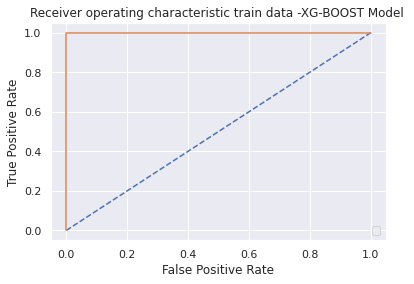

In [ ]:
# predict probabilities
probs = clfXGB.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % train_auc)
# calculate roc curve
train_fpr,train_tpr,train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic train data -XG-BOOST Model ')
plt.legend(loc="lower right")


No handles with labels found to put in legend.


AUC: 0.998


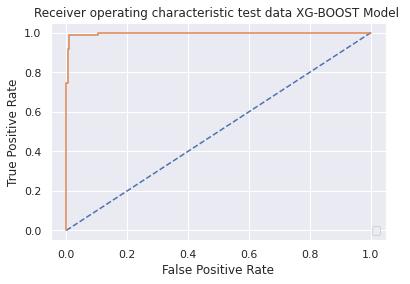

In [ ]:
# predict probabilities
probs = clfXGB.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % test_auc)
# calculate roc curve
test_fpr,test_tpr,test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic test data XG-BOOST Model ')
plt.legend(loc="lower right")
plt.show()

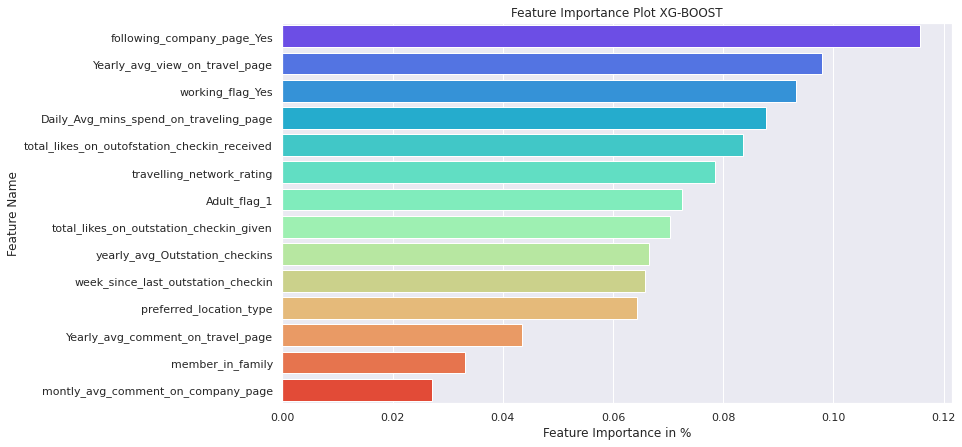

In [ ]:
x=pd.DataFrame(clfXGB.feature_importances_,index=X_train.columns).sort_values(by=0,ascending=False)
plt.figure(figsize=(12,7))
sns.barplot(x[0],x.index,palette='rainbow')
plt.ylabel('Feature Name')
plt.xlabel('Feature Importance in %')
plt.title('Feature Importance Plot XG-BOOST')
plt.show()

In [ ]:
#Permutation Importance
perm = PermutationImportance(clfXGB, scoring = 'accuracy' ,random_state=1).fit(X_test, y_test,)
show_weights(perm, feature_names = list(X_test.columns))

Weight,Feature
0.1387 ± 0.0088,total_likes_on_outofstation_checkin_received
0.1213 ± 0.0366,Yearly_avg_view_on_travel_page
0.0979 ± 0.0105,following_company_page_Yes
0.0619 ± 0.0181,total_likes_on_outstation_checkin_given
0.0438 ± 0.0124,yearly_avg_Outstation_checkins
0.0366 ± 0.0059,travelling_network_rating
0.0342 ± 0.0145,Adult_flag_1
0.0174 ± 0.0024,preferred_location_type
0.0132 ± 0.0081,week_since_last_outstation_checkin
0.0072 ± 0.0124,Yearly_avg_comment_on_travel_page


## Gaussian Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [ ]:
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
# Performance Matrix on train data set

y_train_predict = NB_model.predict(X_train)
model_score = NB_model.score(X_train, y_train)                      ## Accuracy
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))          ## confusion_matrix
print(metrics.classification_report(y_train, y_train_predict))  

0.8167741935483871
[[543  51]
 [ 91  90]]
              precision    recall  f1-score   support

           0       0.86      0.91      0.88       594
           1       0.64      0.50      0.56       181

    accuracy                           0.82       775
   macro avg       0.75      0.71      0.72       775
weighted avg       0.81      0.82      0.81       775



In [ ]:
## Performance Matrix on test data set
y_test_predict = NB_model.predict(X_test)
model_score = NB_model.score(X_test, y_test)                    ## Accuracy
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))         ## confusion_matrix
print(metrics.classification_report(y_test, y_test_predict))  

0.8288288288288288
[[215  23]
 [ 34  61]]
              precision    recall  f1-score   support

           0       0.86      0.90      0.88       238
           1       0.73      0.64      0.68        95

    accuracy                           0.83       333
   macro avg       0.79      0.77      0.78       333
weighted avg       0.82      0.83      0.83       333



AUC and ROC

No handles with labels found to put in legend.


AUC: 0.801


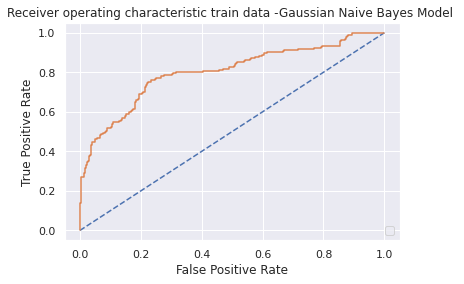

In [ ]:
# predict probabilities
probs = NB_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % train_auc)
# calculate roc curve
train_fpr,train_tpr,train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic train data -Gaussian Naive Bayes Model ')
plt.legend(loc="lower right")


No handles with labels found to put in legend.


AUC: 0.846


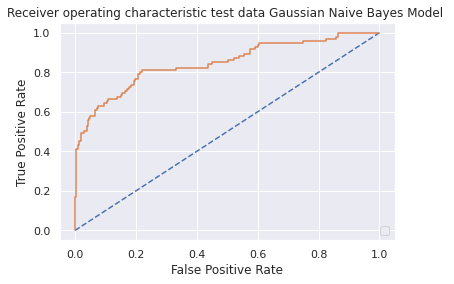

In [ ]:
# predict probabilities
probs =  NB_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % test_auc)
# calculate roc curve
test_fpr,test_tpr,test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic test data Gaussian Naive Bayes Model ')
plt.legend(loc="lower right")
plt.show()

In [ ]:
#Permutation Importance
perm = PermutationImportance(NB_model, scoring = 'accuracy' ,random_state=1).fit(X_test, y_test,)
show_weights(perm, feature_names = list(X_test.columns))

Weight,Feature
0.0426 ± 0.0163,following_company_page_Yes
0.0324 ± 0.0223,Yearly_avg_view_on_travel_page
0.0252 ± 0.0217,Daily_Avg_mins_spend_on_traveling_page
0.0198 ± 0.0145,Adult_flag_1
0.0198 ± 0.0124,week_since_last_outstation_checkin
0.0174 ± 0.0154,total_likes_on_outstation_checkin_given
0.0138 ± 0.0177,total_likes_on_outofstation_checkin_received
0.0126 ± 0.0149,preferred_location_type
0.0024 ± 0.0253,yearly_avg_Outstation_checkins
0.0012 ± 0.0140,working_flag_Yes


## KNN _Model

Generally, good KNN performance usually requires preprocessing of data to make all variables similarly scaled and centered

Now lets apply zscore on continues columns and see the performance for KNN


In [ ]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler()

In [ ]:
X_train = sc.fit_transform(X_train)

In [ ]:
X_test = sc.transform(X_test)

In [ ]:
KNN_model=KNeighborsClassifier()
KNN_model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
## Performance Matrix on train data set
y_train_predict = KNN_model.predict(X_train)
model_score = KNN_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.9587096774193549
[[587   7]
 [ 25 156]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       594
           1       0.96      0.86      0.91       181

    accuracy                           0.96       775
   macro avg       0.96      0.93      0.94       775
weighted avg       0.96      0.96      0.96       775



In [ ]:
## Performance Matrix on test data set
y_test_predict = KNN_model.predict(X_test)
model_score = KNN_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8828828828828829
[[230   8]
 [ 31  64]]
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       238
           1       0.89      0.67      0.77        95

    accuracy                           0.88       333
   macro avg       0.89      0.82      0.84       333
weighted avg       0.88      0.88      0.88       333



In [ ]:
# Default value n_neighbors=5, lets check the performance for K=7

In [ ]:
KNN_model=KNeighborsClassifier(n_neighbors=7)
KNN_model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [ ]:
## Performance Matrix on train data set
y_train_predict = KNN_model.predict(X_train)
model_score = KNN_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.912258064516129
[[582  12]
 [ 56 125]]
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       594
           1       0.91      0.69      0.79       181

    accuracy                           0.91       775
   macro avg       0.91      0.84      0.87       775
weighted avg       0.91      0.91      0.91       775



In [ ]:
## Performance Matrix on test data set
y_test_predict = KNN_model.predict(X_test)
model_score = KNN_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8438438438438438
[[231   7]
 [ 45  50]]
              precision    recall  f1-score   support

           0       0.84      0.97      0.90       238
           1       0.88      0.53      0.66        95

    accuracy                           0.84       333
   macro avg       0.86      0.75      0.78       333
weighted avg       0.85      0.84      0.83       333



In [ ]:
# Run the KNN with no of neighbours to be 1,3,5..19 and *Find the optimal number of neighbours from K=1,3,5,7....19 using the Mis classification error
# 
# Hint: Misclassification error (MCE) = 1 - Test accuracy score. Calculated MCE for each model with neighbours = 1,3,5...19 and find the model with lowest MCE

In [ ]:
# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in range(1,20,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    # evaluate test accuracy
    scores = knn.score(X_test, y_test)
    ac_scores.append(scores)

# changing to misclassification error
MCE = [1 - x for x in ac_scores]
MCE

[0.02102102102102099,
 0.07207207207207211,
 0.11711711711711714,
 0.1561561561561562,
 0.16816816816816815,
 0.1861861861861862,
 0.18918918918918914,
 0.20120120120120122,
 0.21321321321321318,
 0.21621621621621623]

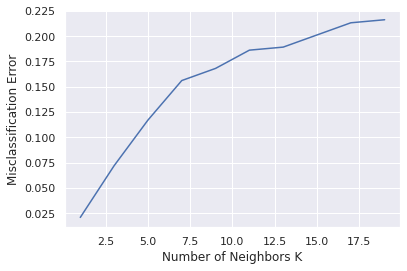

In [ ]:
# Plot misclassification error vs k (with k value on X-axis) using matplotli

import matplotlib.pyplot as plt
# plot misclassification error vs k
plt.plot(range(1,20,2), MCE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [ ]:
KNN_model=KNeighborsClassifier(n_neighbors=17)
KNN_model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=17, p=2,
                     weights='uniform')

In [ ]:
## Performance Matrix on train data set
y_train_predict = KNN_model.predict(X_train)
model_score = KNN_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8412903225806452
[[590   4]
 [119  62]]
              precision    recall  f1-score   support

           0       0.83      0.99      0.91       594
           1       0.94      0.34      0.50       181

    accuracy                           0.84       775
   macro avg       0.89      0.67      0.70       775
weighted avg       0.86      0.84      0.81       775



In [ ]:
## Performance Matrix on test data set
y_test_predict = KNN_model.predict(X_test)
model_score = KNN_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.7867867867867868
[[233   5]
 [ 66  29]]
              precision    recall  f1-score   support

           0       0.78      0.98      0.87       238
           1       0.85      0.31      0.45        95

    accuracy                           0.79       333
   macro avg       0.82      0.64      0.66       333
weighted avg       0.80      0.79      0.75       333



AUC and ROC

No handles with labels found to put in legend.


AUC: 0.921


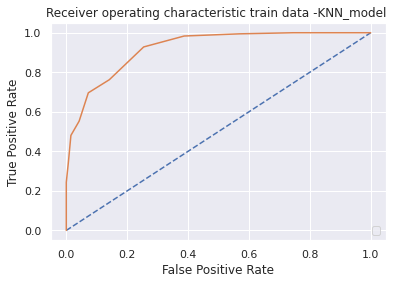

In [ ]:
# predict probabilities
probs = KNN_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % train_auc)
# calculate roc curve
train_fpr,train_tpr,train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic train data -KNN_model ')
plt.legend(loc="lower right")

No handles with labels found to put in legend.


AUC: 0.878


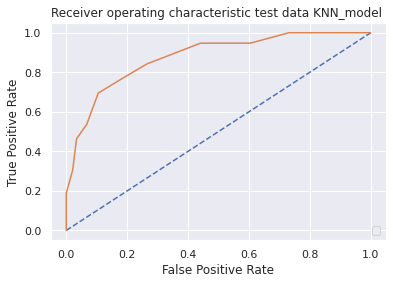

In [ ]:
# predict probabilities
probs = KNN_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % test_auc)
# calculate roc curve
test_fpr,test_tpr,test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic test data KNN_model ')
plt.legend(loc="lower right")
plt.show()

## ANN Model

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
sc = StandardScaler()

In [ ]:
X_train = sc.fit_transform(X_train)

In [ ]:
X_test = sc.transform(X_test)

In [ ]:
clf = MLPClassifier(hidden_layer_sizes=100, max_iter=5000,
                     solver='sgd', verbose=True,  random_state=21,tol=0.01)

In [ ]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

Iteration 1, loss = 0.72158231
Iteration 2, loss = 0.71194316
Iteration 3, loss = 0.69749856
Iteration 4, loss = 0.68108136
Iteration 5, loss = 0.66435340
Iteration 6, loss = 0.64808505
Iteration 7, loss = 0.63259349
Iteration 8, loss = 0.61878130
Iteration 9, loss = 0.60588258
Iteration 10, loss = 0.59409028
Iteration 11, loss = 0.58369375
Iteration 12, loss = 0.57469131
Iteration 13, loss = 0.56639363
Iteration 14, loss = 0.55908603
Iteration 15, loss = 0.55246930
Iteration 16, loss = 0.54654701
Iteration 17, loss = 0.54125915
Iteration 18, loss = 0.53644080
Iteration 19, loss = 0.53193025
Iteration 20, loss = 0.52808316
Iteration 21, loss = 0.52453676
Iteration 22, loss = 0.52111295
Training loss did not improve more than tol=0.010000 for 10 consecutive epochs. Stopping.


In [ ]:
pred2 = clf.predict(X_train)
confusion_matrix(y_train,pred2)

array([[580,  14],
       [151,  30]])

In [ ]:
print(classification_report(y_train, pred2))

              precision    recall  f1-score   support

           0       0.79      0.98      0.88       594
           1       0.68      0.17      0.27       181

    accuracy                           0.79       775
   macro avg       0.74      0.57      0.57       775
weighted avg       0.77      0.79      0.73       775



In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[233,   5],
       [ 75,  20]])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.98      0.85       238
           1       0.80      0.21      0.33        95

    accuracy                           0.76       333
   macro avg       0.78      0.59      0.59       333
weighted avg       0.77      0.76      0.71       333



AUC and ROC

AUC: 0.673


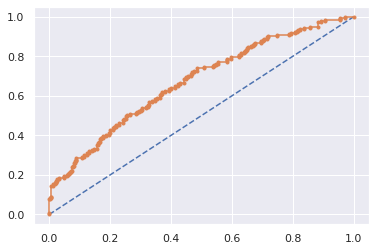

In [ ]:
# AUC and ROC for the training data

# predict probabilities
probs = clf.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.686


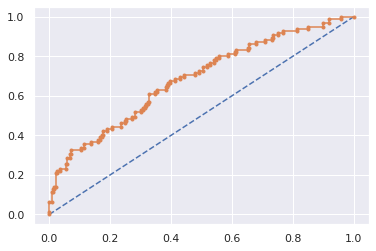

In [ ]:
# AUC and ROC for the test data

# predict probabilities
probs = clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

## Hyper Tune Models -Laptop

## Extreme Gradient Boosting Machine (XG-Boost)-After Hyperparameter Tuning

In [ ]:
# example of grid searching key hyperparameters for BaggingClassifier
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from matplotlib import pyplot

In [ ]:
# grid search
model = XGBClassifier()
n_estimators = range(50, 1000, 50)
param_grid = dict(n_estimators=n_estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train, y_train)

In [ ]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.114007 using {'n_estimators': 950}
-0.305357 (0.033750) with: {'n_estimators': 50}
-0.243373 (0.042191) with: {'n_estimators': 100}
-0.205118 (0.044368) with: {'n_estimators': 150}
-0.180173 (0.047162) with: {'n_estimators': 200}
-0.161493 (0.050526) with: {'n_estimators': 250}
-0.148734 (0.054142) with: {'n_estimators': 300}
-0.139241 (0.057443) with: {'n_estimators': 350}
-0.133085 (0.060869) with: {'n_estimators': 400}
-0.127224 (0.062814) with: {'n_estimators': 450}
-0.123905 (0.064962) with: {'n_estimators': 500}
-0.121436 (0.068329) with: {'n_estimators': 550}
-0.119492 (0.069712) with: {'n_estimators': 600}
-0.118551 (0.071157) with: {'n_estimators': 650}
-0.117802 (0.072639) with: {'n_estimators': 700}
-0.116476 (0.073331) with: {'n_estimators': 750}
-0.115552 (0.074231) with: {'n_estimators': 800}
-0.114869 (0.074960) with: {'n_estimators': 850}
-0.114383 (0.076054) with: {'n_estimators': 900}
-0.114007 (0.076850) with: {'n_estimators': 950}


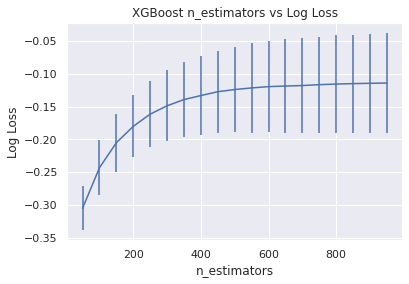

In [ ]:
# plot
pyplot.errorbar(n_estimators, means, yerr=stds)
pyplot.title("XGBoost n_estimators vs Log Loss")
pyplot.xlabel('n_estimators')
pyplot.ylabel('Log Loss')
pyplot.savefig('n_estimators.png')

In [ ]:
# n_estimater is 650 as there is not much logloss after this. 

XGBoost on dataset, Tune max_depth


In [ ]:
# grid search
model = XGBClassifier()
max_depth = range(1, 17, 2)
print(max_depth)
param_grid = dict(max_depth=max_depth)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold, verbose=1)
grid_result = grid_search.fit(X_train, y_train)

range(1, 17, 2)
Fitting 10 folds for each of 8 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    6.8s finished


In [ ]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.115347 using {'max_depth': 11}
-0.408964 (0.023471) with: {'max_depth': 1}
-0.243373 (0.042191) with: {'max_depth': 3}
-0.135826 (0.041554) with: {'max_depth': 5}
-0.116776 (0.039708) with: {'max_depth': 7}
-0.118623 (0.041300) with: {'max_depth': 9}
-0.115347 (0.042326) with: {'max_depth': 11}
-0.116582 (0.043488) with: {'max_depth': 13}
-0.116582 (0.043488) with: {'max_depth': 15}


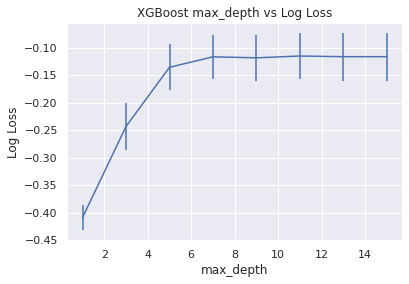

In [ ]:
# plot
pyplot.errorbar(max_depth, means, yerr=stds)
pyplot.title("XGBoost max_depth vs Log Loss")
pyplot.xlabel('max_depth')
pyplot.ylabel('Log Loss')
pyplot.savefig('max_depth.png')

In [ ]:
# Max Depth is 8 and 9

Finding number of trees

In [ ]:
# grid search
model = XGBClassifier()
n_estimators = [50,100,150,200,250,300,350,400,450,500]
max_depth = [ 2, 3, 4,4,6,7,8]
print(max_depth)
param_grid = dict(max_depth=max_depth, n_estimators=n_estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold, verbose=1)
grid_result = grid_search.fit(X_train, y_train)

[2, 3, 4, 4, 6, 7, 8]
Fitting 10 folds for each of 70 candidates, totalling 700 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 122 tasks      | elapsed:   10.2s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:   30.0s
[Parallel(n_jobs=-1)]: Done 522 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 700 out of 700 | elapsed:  1.8min finished


In [ ]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.092470 using {'max_depth': 7, 'n_estimators': 500}
-0.371808 (0.029371) with: {'max_depth': 2, 'n_estimators': 50}
-0.324011 (0.039197) with: {'max_depth': 2, 'n_estimators': 100}
-0.292301 (0.046212) with: {'max_depth': 2, 'n_estimators': 150}
-0.273017 (0.053603) with: {'max_depth': 2, 'n_estimators': 200}
-0.254537 (0.053805) with: {'max_depth': 2, 'n_estimators': 250}
-0.239744 (0.056493) with: {'max_depth': 2, 'n_estimators': 300}
-0.226527 (0.057687) with: {'max_depth': 2, 'n_estimators': 350}
-0.213786 (0.057700) with: {'max_depth': 2, 'n_estimators': 400}
-0.202634 (0.058622) with: {'max_depth': 2, 'n_estimators': 450}
-0.195117 (0.060866) with: {'max_depth': 2, 'n_estimators': 500}
-0.305357 (0.033750) with: {'max_depth': 3, 'n_estimators': 50}
-0.243373 (0.042191) with: {'max_depth': 3, 'n_estimators': 100}
-0.205118 (0.044368) with: {'max_depth': 3, 'n_estimators': 150}
-0.180173 (0.047162) with: {'max_depth': 3, 'n_estimators': 200}
-0.161493 (0.050526) with: {'max

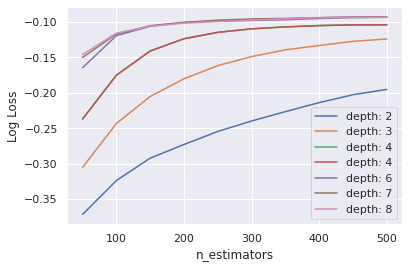

In [ ]:
import numpy as np

# plot results
scores = np.array(means).reshape(len(max_depth), len(n_estimators))
for i, value in enumerate(max_depth):
    pyplot.plot(n_estimators, scores[i], label='depth: ' + str(value))
pyplot.legend()
pyplot.xlabel('n_estimators')
pyplot.ylabel('Log Loss')
pyplot.savefig('n_estimators_vs_max_depth.png')

In [ ]:
# grid search
model = XGBClassifier()
learning_rate = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3,0.4,0.5,0.6]
print(max_depth)
param_grid = dict(learning_rate=learning_rate)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold, verbose=1)
grid_result = grid_search.fit(X_train, y_train)

[2, 3, 4, 4, 6, 7, 8]
Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  87 out of  90 | elapsed:    4.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    4.5s finished


In [ ]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.118101 using {'learning_rate': 0.6}
-0.688792 (0.000374) with: {'learning_rate': 0.0001}
-0.653880 (0.002829) with: {'learning_rate': 0.001}
-0.468894 (0.017085) with: {'learning_rate': 0.01}
-0.243373 (0.042191) with: {'learning_rate': 0.1}
-0.176930 (0.049537) with: {'learning_rate': 0.2}
-0.143152 (0.057300) with: {'learning_rate': 0.3}
-0.120519 (0.060237) with: {'learning_rate': 0.4}
-0.119023 (0.064969) with: {'learning_rate': 0.5}
-0.118101 (0.078390) with: {'learning_rate': 0.6}


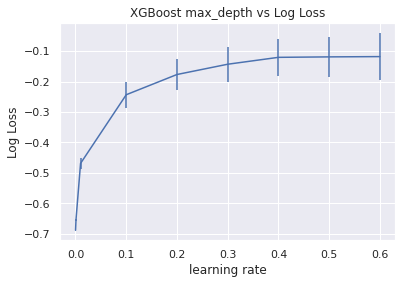

In [ ]:
# plot
pyplot.errorbar(learning_rate, means, yerr=stds)
pyplot.title("XGBoost max_depth vs Log Loss")
pyplot.xlabel('learning rate')
pyplot.ylabel('Log Loss')
pyplot.savefig('max_depth.png')

In [ ]:
# grid search
model = XGBClassifier()
base_score = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8]
print(base_score)
param_grid = dict(base_score=base_score)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold, verbose=1)
grid_result = grid_search.fit(X_train, y_train)

[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
Fitting 10 folds for each of 8 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    4.0s finished


In [ ]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.237790 using {'base_score': 0.1}
-0.237790 (0.040788) with: {'base_score': 0.1}
-0.237923 (0.043634) with: {'base_score': 0.2}
-0.243305 (0.041919) with: {'base_score': 0.3}
-0.245197 (0.038216) with: {'base_score': 0.4}
-0.243373 (0.042191) with: {'base_score': 0.5}
-0.243822 (0.042950) with: {'base_score': 0.6}
-0.241207 (0.042077) with: {'base_score': 0.7}
-0.241913 (0.040867) with: {'base_score': 0.8}


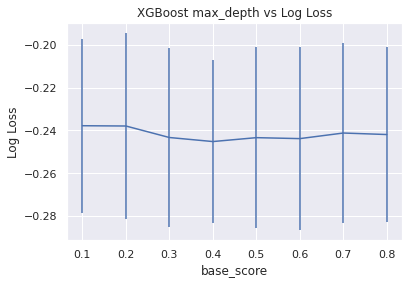

In [ ]:
# plot
pyplot.errorbar(base_score, means, yerr=stds)
pyplot.title("XGBoost max_depth vs Log Loss")
pyplot.xlabel('base_score')
pyplot.ylabel('Log Loss')
pyplot.savefig('base_score.png')

Hyperparameter Tuned XGBoost model

In [ ]:
clfXGB=xgb.XGBClassifier(n_estimators=650,learning_rate=0.8, max_depth=8, gamma=5, base_score=0.55)

In [ ]:
clfXGB.fit(X_train, y_train)

XGBClassifier(base_score=0.55, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=5,
              learning_rate=0.8, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=None, n_estimators=650, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
clfXGB=xgb.XGBClassifier(n_estimators=650,learning_rate=0.8, max_depth=8, gamma=5, base_score=0.55)
clfXGB.fit(X_train, y_train)
y_pred_train=clfXGB.predict(X_train)
model_scoreXGB=clfXGB.score(X_train,y_train)
print(model_scoreXGB)
print(metrics.confusion_matrix(y_train,y_pred_train))
print(metrics.classification_report(y_train, y_pred_train))

0.9754838709677419
[[591   3]
 [ 16 165]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       594
           1       0.98      0.91      0.95       181

    accuracy                           0.98       775
   macro avg       0.98      0.95      0.96       775
weighted avg       0.98      0.98      0.98       775



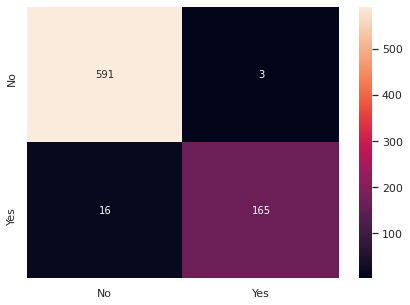

In [ ]:
cm=metrics.confusion_matrix(y_train, y_pred_train,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [ ]:
y_pred=clfXGB.predict(X_test)
model_scoreXGB=clfXGB.score(X_test,y_test)
print(model_scoreXGB)
print(metrics.confusion_matrix(y_test,y_pred))
print(metrics.classification_report(y_test, y_pred))

0.9459459459459459
[[231   7]
 [ 11  84]]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       238
           1       0.92      0.88      0.90        95

    accuracy                           0.95       333
   macro avg       0.94      0.93      0.93       333
weighted avg       0.95      0.95      0.95       333



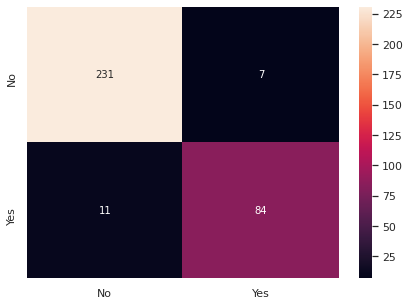

In [ ]:
cm=metrics.confusion_matrix(y_test, y_pred,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

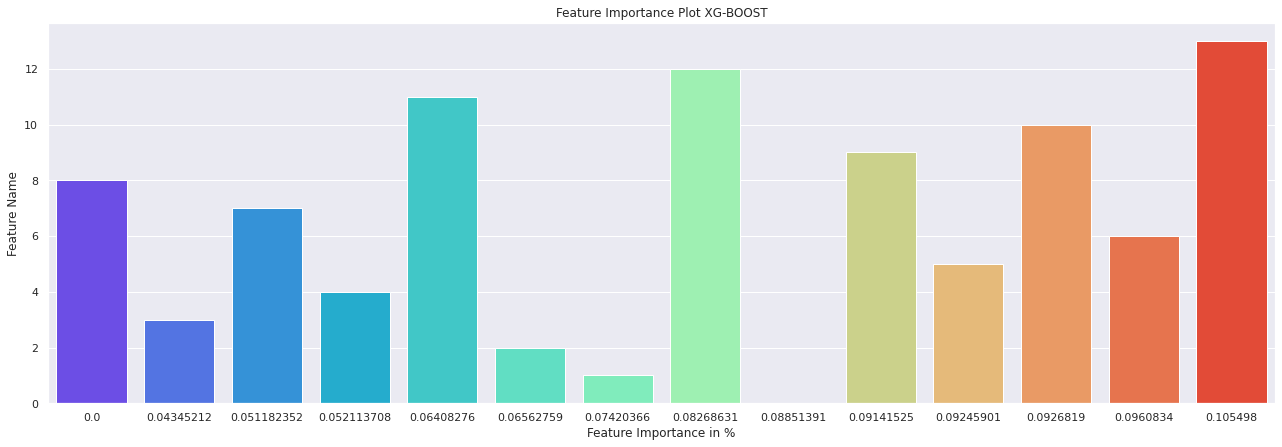

In [ ]:
x=pd.DataFrame(clfXGB.feature_importances_).sort_values(by=0,ascending=False)
plt.figure(figsize=(22,7))
sns.barplot(x[0],x.index,palette='rainbow')
plt.ylabel('Feature Name')
plt.xlabel('Feature Importance in %')
plt.title('Feature Importance Plot XG-BOOST')
plt.show()

No handles with labels found to put in legend.


AUC: 0.997


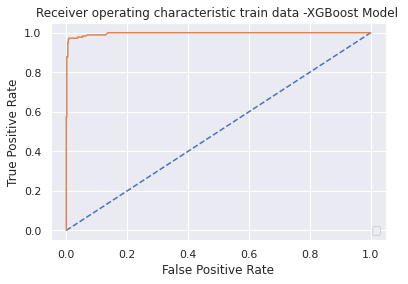

In [ ]:
# predict probabilities
probs = clfXGB.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % train_auc)
# calculate roc curve
train_fpr,train_tpr,train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic train data -XGBoost Model ')
plt.legend(loc="lower right")
plt.savefig('XGBoost _ROC')

No handles with labels found to put in legend.


AUC: 0.986


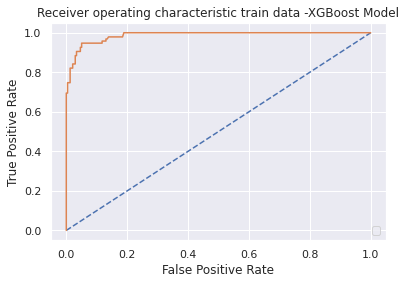

In [ ]:
# predict probabilities
probs = clfXGB.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
train_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % train_auc)
# calculate roc curve
train_fpr,train_tpr,train_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic train data -XGBoost Model')
plt.legend(loc="lower right")
plt.savefig('XGBoost _ROC')

In [ ]:

model = xgb.XGBClassifier(n_estimators=650,learning_rate=0.8, max_depth=8, gamma=5, base_score=0.55) # XGBClassifier()
model.fit(X_train, y_train)
pd.DataFrame({'Variable':X.columns,
              'Importance':model.feature_importances_*100}).sort_values('Importance', ascending=False)

,Variable,Importance
13,following_company_page_Yes,10.549800
6,total_likes_on_outofstation_checkin_received,9.608340
10,Daily_Avg_mins_spend_on_traveling_page,9.268190
5,Yearly_avg_comment_on_travel_page,9.245901
9,travelling_network_rating,9.141525
0,Yearly_avg_view_on_travel_page,8.851391
12,working_flag_Yes,8.268631
1,total_likes_on_outstation_checkin_given,7.420366
2,yearly_avg_Outstation_checkins,6.562759
11,Adult_flag_1,6.408276


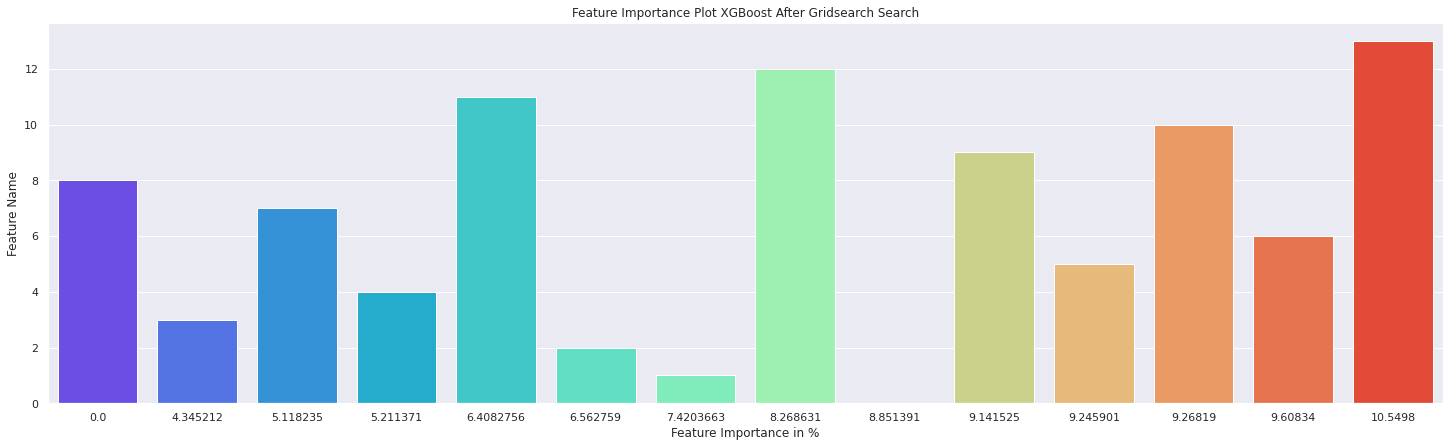

In [ ]:
x=pd.DataFrame(model.feature_importances_*100,).sort_values(by=0,ascending=False)
plt.figure(figsize=(25,7))
sns.barplot(x[0],x.index,palette='rainbow')
plt.ylabel('Feature Name')
plt.xlabel('Feature Importance in %')
plt.title('Feature Importance Plot XGBoost After Gridsearch Search')
plt.show()

In [ ]:
perm = PermutationImportance(model, scoring = 'accuracy' ,random_state=101).fit(X_test, y_test)
show_weights(perm, feature_names = list(X.columns))

Weight,Feature
0.1399 ± 0.0431,total_likes_on_outofstation_checkin_received
0.1159 ± 0.0441,Yearly_avg_view_on_travel_page
0.0691 ± 0.0292,total_likes_on_outstation_checkin_given
0.0661 ± 0.0142,following_company_page_Yes
0.0438 ± 0.0345,Adult_flag_1
0.0408 ± 0.0233,preferred_location_type
0.0306 ± 0.0088,travelling_network_rating
0.0294 ± 0.0116,yearly_avg_Outstation_checkins
0.0294 ± 0.0122,week_since_last_outstation_checkin
0.0144 ± 0.0045,Daily_Avg_mins_spend_on_traveling_page


## KNN Tuned

In [ ]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler()

In [ ]:
X_train = sc.fit_transform(X_train)

In [ ]:
# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in range(1,20,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    # evaluate test accuracy
    scores = knn.score(X_test, y_test)
    ac_scores.append(scores)

# changing to misclassification error
MCE = [1 - x for x in ac_scores]
MCE

[0.02102102102102099,
 0.07207207207207211,
 0.11711711711711714,
 0.1561561561561562,
 0.16816816816816815,
 0.1861861861861862,
 0.18918918918918914,
 0.20120120120120122,
 0.21321321321321318,
 0.21621621621621623]

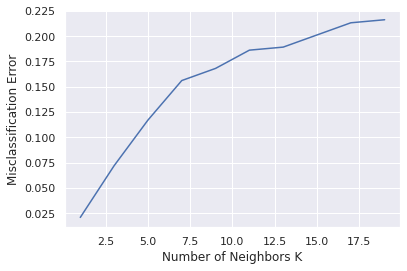

In [ ]:
# Plot misclassification error vs k (with k value on X-axis) using matplotli

import matplotlib.pyplot as plt
# plot misclassification error vs k
plt.plot(range(1,20,2), MCE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [ ]:
KNN_model=KNeighborsClassifier(n_neighbors=2,p = 3)
KNN_model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=3,
                     weights='uniform')

In [ ]:
## Performance Matrix on train data set
y_train_predict = KNN_model.predict(X_train)
model_score = KNN_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.9806451612903225
[[594   0]
 [ 15 166]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       594
           1       1.00      0.92      0.96       181

    accuracy                           0.98       775
   macro avg       0.99      0.96      0.97       775
weighted avg       0.98      0.98      0.98       775



In [ ]:
## Performance Matrix on test data set
y_test_predict = KNN_model.predict(X_test)
model_score = KNN_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.9219219219219219
[[238   0]
 [ 26  69]]
              precision    recall  f1-score   support

           0       0.90      1.00      0.95       238
           1       1.00      0.73      0.84        95

    accuracy                           0.92       333
   macro avg       0.95      0.86      0.89       333
weighted avg       0.93      0.92      0.92       333



AUC and ROC

No handles with labels found to put in legend.


AUC: 1.000


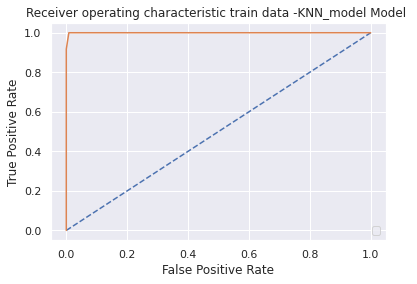

In [ ]:
# predict probabilities
probs = KNN_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % train_auc)
# calculate roc curve
train_fpr,train_tpr,train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic train data -KNN_model Model ')
plt.legend(loc="lower right")

No handles with labels found to put in legend.


AUC: 0.954


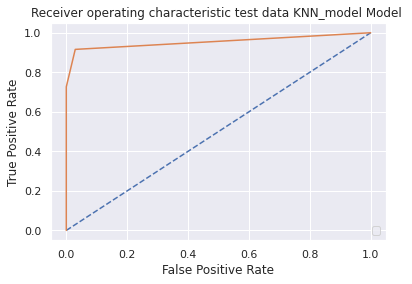

In [ ]:
# predict probabilities
probs = KNN_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % test_auc)
# calculate roc curve
test_fpr,test_tpr,test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic test data KNN_model Model ')
plt.legend(loc="lower right")
plt.show()

With Smote

In [ ]:
from imblearn.over_sampling import SMOTE
# SMOTE is only applied on the train data set

In [ ]:
sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

In [ ]:
## Let's check the shape after SMOTE
X_train_res.shape

(1188, 14)

In [ ]:
# KNN With SMOTE¶
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
KNN_SM_model=KNeighborsClassifier(n_neighbors=17, weights='distance')
KNN_SM_model.fit(X_train_res,y_train_res)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=17, p=2,
                     weights='distance')

In [ ]:
## Performance Matrix on train data set
y_train_predict = KNN_SM_model.predict(X_train_res)
model_score = KNN_SM_model.score(X_train_res, y_train_res)
print(model_score)
print(metrics.confusion_matrix(y_train_res, y_train_predict))
print(metrics.classification_report(y_train_res, y_train_predict))

1.0
[[594   0]
 [  0 594]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       594
           1       1.00      1.00      1.00       594

    accuracy                           1.00      1188
   macro avg       1.00      1.00      1.00      1188
weighted avg       1.00      1.00      1.00      1188



In [ ]:
## Performance Matrix on test data set
y_test_predict = KNN_SM_model.predict(X_test)
model_score = KNN_SM_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8708708708708709
[[206  32]
 [ 11  84]]
              precision    recall  f1-score   support

           0       0.95      0.87      0.91       238
           1       0.72      0.88      0.80        95

    accuracy                           0.87       333
   macro avg       0.84      0.87      0.85       333
weighted avg       0.89      0.87      0.87       333



AUC and ROC

No handles with labels found to put in legend.


AUC: 1.000


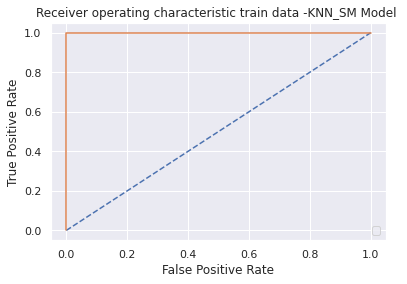

In [ ]:
# predict probabilities
probs = KNN_SM_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % train_auc)
# calculate roc curve
train_fpr,train_tpr,train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic train data -KNN_SM Model ')
plt.legend(loc="lower right")

No handles with labels found to put in legend.


AUC: 0.313


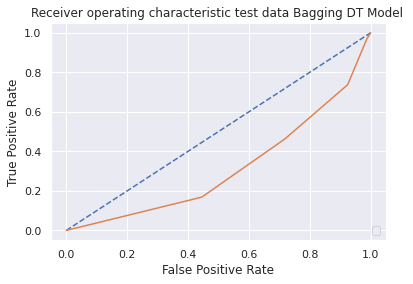

In [ ]:
# predict probabilities
probs = bgcl.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % test_auc)
# calculate roc curve
test_fpr,test_tpr,test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic test data Bagging DT Model ')
plt.legend(loc="lower right")
plt.show()

## LightGBM Model

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from matplotlib import pyplot

n_estimators

In [ ]:
# grid search
model = LGBMClassifier()
n_estimators = range(10, 300, 20)
param_grid = dict(n_estimators=n_estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train, y_train)

In [ ]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.081737 using {'n_estimators': 130}
-0.352917 (0.022945) with: {'n_estimators': 10}
-0.197257 (0.034737) with: {'n_estimators': 30}
-0.130541 (0.036402) with: {'n_estimators': 50}
-0.103072 (0.045167) with: {'n_estimators': 70}
-0.091096 (0.055591) with: {'n_estimators': 90}
-0.084731 (0.068433) with: {'n_estimators': 110}
-0.081737 (0.078838) with: {'n_estimators': 130}
-0.082402 (0.088541) with: {'n_estimators': 150}
-0.085415 (0.096939) with: {'n_estimators': 170}
-0.087842 (0.105591) with: {'n_estimators': 190}
-0.092072 (0.112096) with: {'n_estimators': 210}
-0.096694 (0.120924) with: {'n_estimators': 230}
-0.099040 (0.127673) with: {'n_estimators': 250}
-0.100812 (0.131766) with: {'n_estimators': 270}
-0.101831 (0.132782) with: {'n_estimators': 290}


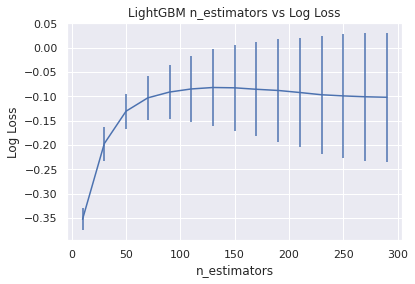

In [ ]:
# plot
pyplot.errorbar(n_estimators, means, yerr=stds)
pyplot.title("LightGBM n_estimators vs Log Loss")
pyplot.xlabel('n_estimators')
pyplot.ylabel('Log Loss')
pyplot.savefig('n_estimators.png')

max_depth

In [ ]:
# grid search
max_depth = range(1, 17, 2)
print(max_depth)
param_grid = dict(max_depth=max_depth)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold, verbose=1)
grid_result = grid_search.fit(X_train, y_train)

range(1, 17, 2)
Fitting 10 folds for each of 8 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    3.6s finished


In [ ]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.080077 using {'max_depth': 13}
-0.403875 (0.022059) with: {'max_depth': 1}
-0.231485 (0.040530) with: {'max_depth': 3}
-0.135831 (0.055675) with: {'max_depth': 5}
-0.102439 (0.059248) with: {'max_depth': 7}
-0.089827 (0.057015) with: {'max_depth': 9}
-0.086375 (0.062569) with: {'max_depth': 11}
-0.080077 (0.054134) with: {'max_depth': 13}
-0.087319 (0.062440) with: {'max_depth': 15}


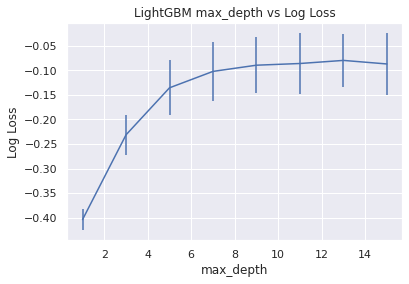

In [ ]:
# plot
pyplot.errorbar(max_depth, means, yerr=stds)
pyplot.title("LightGBM max_depth vs Log Loss")
pyplot.xlabel('max_depth')
pyplot.ylabel('Log Loss')
pyplot.savefig('max_depth.png')

Learing rate

In [ ]:
learning_rate = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3,0.4,0.5,0.6]
print(max_depth)
param_grid = dict(learning_rate=learning_rate)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold, verbose=1)
grid_result = grid_search.fit(X_train, y_train)

range(1, 17, 2)
Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    4.8s finished


In [ ]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.078313 using {'learning_rate': 0.2}
-0.540189 (0.004241) with: {'learning_rate': 0.0001}
-0.514670 (0.004394) with: {'learning_rate': 0.001}
-0.356847 (0.019627) with: {'learning_rate': 0.01}
-0.088034 (0.062285) with: {'learning_rate': 0.1}
-0.078313 (0.090313) with: {'learning_rate': 0.2}
-0.100152 (0.125250) with: {'learning_rate': 0.3}
-0.100388 (0.117269) with: {'learning_rate': 0.4}
-0.106624 (0.123918) with: {'learning_rate': 0.5}
-0.120553 (0.141235) with: {'learning_rate': 0.6}


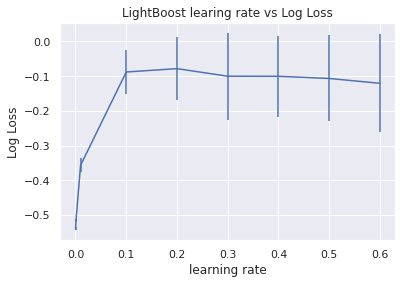

In [ ]:
# plot
pyplot.errorbar(learning_rate, means, yerr=stds)
pyplot.title("LightBoost learing rate vs Log Loss")
pyplot.xlabel('learning rate')
pyplot.ylabel('Log Loss')
pyplot.savefig('max_depth.png')

reg_alpha

In [ ]:
reg_alpha = [0.01, 0.1, 0.2, 0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
print(max_depth)
param_grid = dict(reg_alpha=reg_alpha)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold, verbose=1)
grid_result = grid_search.fit(X_train, y_train)

range(1, 17, 2)
Fitting 10 folds for each of 11 candidates, totalling 110 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 110 out of 110 | elapsed:    5.4s finished


In [ ]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.086160 using {'reg_alpha': 0.01}
-0.086160 (0.053129) with: {'reg_alpha': 0.01}
-0.088051 (0.051731) with: {'reg_alpha': 0.1}
-0.100432 (0.051327) with: {'reg_alpha': 0.2}
-0.105878 (0.041704) with: {'reg_alpha': 0.3}
-0.110816 (0.039949) with: {'reg_alpha': 0.4}
-0.113939 (0.039792) with: {'reg_alpha': 0.5}
-0.125924 (0.044203) with: {'reg_alpha': 0.6}
-0.127481 (0.041227) with: {'reg_alpha': 0.7}
-0.129740 (0.037386) with: {'reg_alpha': 0.8}
-0.135927 (0.036515) with: {'reg_alpha': 0.9}
-0.140208 (0.033195) with: {'reg_alpha': 1}


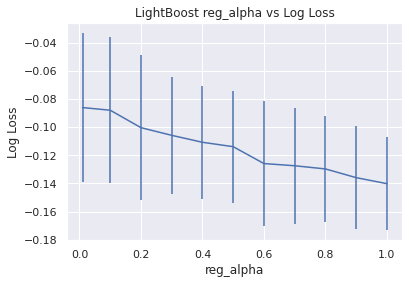

In [ ]:
# plot
pyplot.errorbar(reg_alpha, means, yerr=stds)
pyplot.title("LightBoost reg_alpha vs Log Loss")
pyplot.xlabel('reg_alpha')
pyplot.ylabel('Log Loss')
pyplot.savefig('max_depth.png')

reg_lambda

In [ ]:
reg_lambda = [0.01,0.2,0.5,0.6,0.7,0.9,1,1.5,2,2.5,3,3.5,4,4.5,5]
print(max_depth)
param_grid = dict(reg_lambda=reg_lambda)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold, verbose=1)
grid_result = grid_search.fit(X_train, y_train)

range(1, 17, 2)
Fitting 10 folds for each of 15 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    7.6s finished


In [ ]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.079485 using {'reg_lambda': 0.01}
-0.079485 (0.049937) with: {'reg_lambda': 0.01}
-0.093353 (0.053556) with: {'reg_lambda': 0.2}
-0.098819 (0.044200) with: {'reg_lambda': 0.5}
-0.101641 (0.042146) with: {'reg_lambda': 0.6}
-0.107560 (0.042972) with: {'reg_lambda': 0.7}
-0.106420 (0.037776) with: {'reg_lambda': 0.9}
-0.108114 (0.038504) with: {'reg_lambda': 1}
-0.122134 (0.037988) with: {'reg_lambda': 1.5}
-0.128733 (0.035158) with: {'reg_lambda': 2}
-0.133017 (0.032315) with: {'reg_lambda': 2.5}
-0.140495 (0.031177) with: {'reg_lambda': 3}
-0.147782 (0.033515) with: {'reg_lambda': 3.5}
-0.153170 (0.032494) with: {'reg_lambda': 4}
-0.159973 (0.027188) with: {'reg_lambda': 4.5}
-0.163235 (0.027606) with: {'reg_lambda': 5}


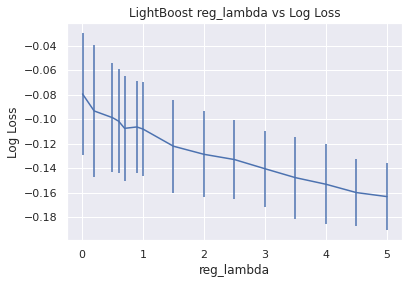

In [ ]:
# plot
pyplot.errorbar(reg_lambda, means, yerr=stds)
pyplot.title("LightBoost reg_lambda vs Log Loss")
pyplot.xlabel('reg_lambda')
pyplot.ylabel('Log Loss')
pyplot.savefig('max_depth.png')

Param imputation

In [ ]:
from lightgbm import LGBMClassifier

In [ ]:
lgbm = LGBMClassifier(max_depth=8, reg_alpha=0.5, reg_lambda=3, learning_rate=0.05, n_estimators=50, class_weight='balanced')

In [ ]:
lgbm = lgbm.fit(X_train, y_train)


In [ ]:
y_predict_test = lgbm.predict(X_test)
print(metrics.classification_report(y_test, y_predict_test,digits=2))

              precision    recall  f1-score   support

           0       0.98      0.90      0.94       238
           1       0.80      0.96      0.87        95

    accuracy                           0.92       333
   macro avg       0.89      0.93      0.91       333
weighted avg       0.93      0.92      0.92       333



In [ ]:
y_predict = lgbm.predict(X_train)
print(metrics.classification_report(y_train, y_predict, digits=2))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97       594
           1       0.83      0.99      0.91       181

    accuracy                           0.95       775
   macro avg       0.92      0.97      0.94       775
weighted avg       0.96      0.95      0.95       775



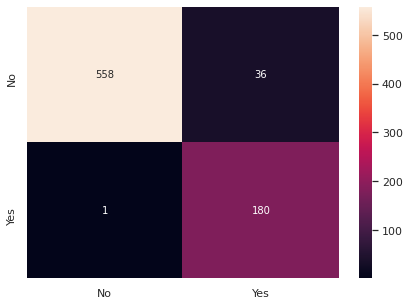

In [ ]:

cm=metrics.confusion_matrix(y_train, y_predict,labels=[0, 1])


df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

AUC and ROC

No handles with labels found to put in legend.


AUC: 0.995


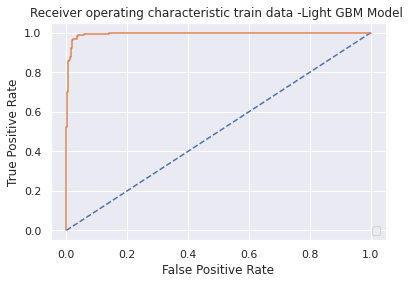

In [ ]:
# predict probabilities
probs = lgbm.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % train_auc)
# calculate roc curve
train_fpr,train_tpr,train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic train data -Light GBM Model ')
plt.legend(loc="lower right")

No handles with labels found to put in legend.


AUC: 0.979


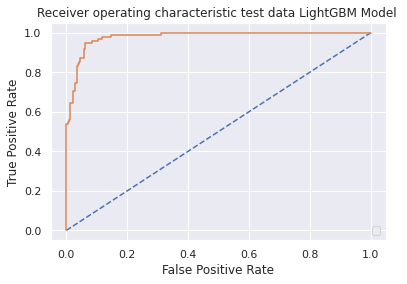

In [ ]:
# predict probabilities
probs = lgbm.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % test_auc)
# calculate roc curve
test_fpr,test_tpr,test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic test data LightGBM Model ')
plt.legend(loc="lower right")
plt.show()

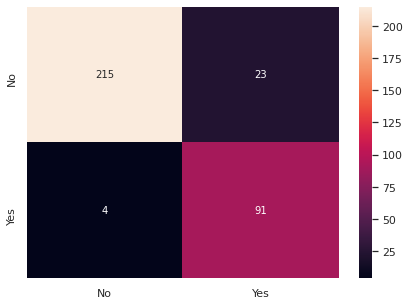

In [ ]:

cm=metrics.confusion_matrix(y_test, y_predict_test,labels=[0, 1])


df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [ ]:

feature_importance =pd.DataFrame({'Variable':X.columns,
              'Importance':lgbm.feature_importances_}).sort_values('Importance', ascending=False)

feature_importance

,Variable,Importance
0,Yearly_avg_view_on_travel_page,170
1,total_likes_on_outstation_checkin_given,153
6,total_likes_on_outofstation_checkin_received,120
2,yearly_avg_Outstation_checkins,108
5,Yearly_avg_comment_on_travel_page,67
13,following_company_page_Yes,57
11,Adult_flag_1,46
7,week_since_last_outstation_checkin,45
4,preferred_location_type,39
9,travelling_network_rating,39


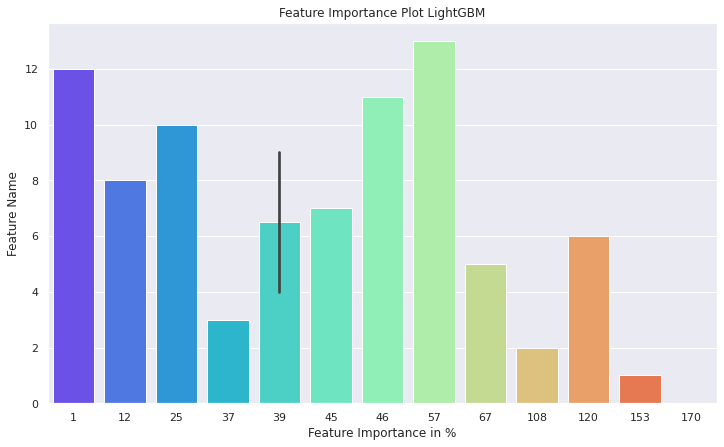

In [ ]:
x=pd.DataFrame(lgbm.feature_importances_).sort_values(by=0,ascending=False)
plt.figure(figsize=(12,7))
sns.barplot(x[0],x.index,palette='rainbow')
plt.ylabel('Feature Name')
plt.xlabel('Feature Importance in %')
plt.title('Feature Importance Plot LightGBM')
plt.show()

## Ensemble Learning - Bagging

In [ ]:
bgcl_light = BaggingClassifier( n_estimators=50,random_state=1,base_estimator=LGBMClassifier(max_depth=8, reg_alpha=0.5, reg_lambda=3, learning_rate=0.025, n_estimators=50, class_weight='balanced') )

bgcl_light = bgcl_light.fit(X_train, y_train)

0.9225806451612903


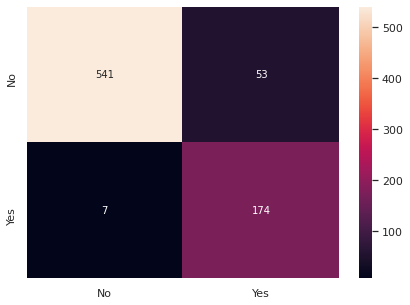

In [ ]:
y_predict = bgcl_light.predict(X_train)

print(bgcl_light.score(X_train , y_train))

cm=metrics.confusion_matrix(y_train, y_predict,labels=[0, 1])


df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [ ]:
print(metrics.classification_report(y_train, y_predict,digits=2))

              precision    recall  f1-score   support

           0       0.99      0.91      0.95       594
           1       0.77      0.96      0.85       181

    accuracy                           0.92       775
   macro avg       0.88      0.94      0.90       775
weighted avg       0.94      0.92      0.93       775



0.8918918918918919


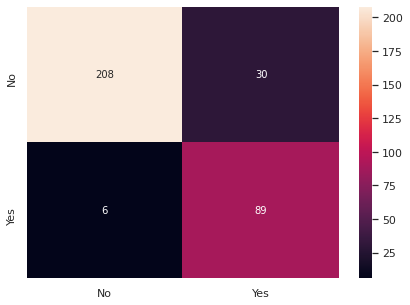

In [ ]:

y_predict = bgcl_light.predict(X_test)

print(bgcl_light.score(X_test , y_test))


cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g');

In [ ]:
print(metrics.classification_report(y_test, y_predict,digits=2))

              precision    recall  f1-score   support

           0       0.97      0.87      0.92       238
           1       0.75      0.94      0.83        95

    accuracy                           0.89       333
   macro avg       0.86      0.91      0.88       333
weighted avg       0.91      0.89      0.90       333



AUC and ROC

No handles with labels found to put in legend.


AUC: 0.981


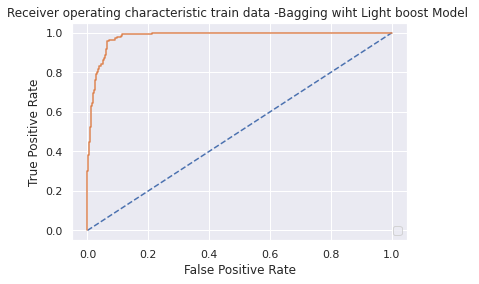

In [ ]:
# predict probabilities
probs = bgcl_light.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % train_auc)
# calculate roc curve
train_fpr,train_tpr,train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic train data -Bagging wiht Light boost Model ')
plt.legend(loc="lower right")

No handles with labels found to put in legend.


AUC: 0.957


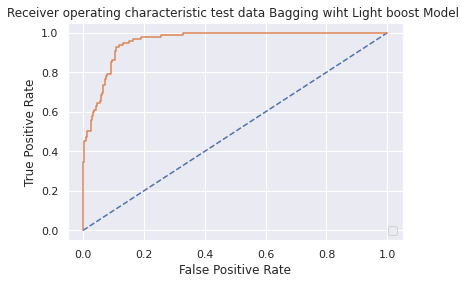

In [ ]:
# predict probabilities
probs = bgcl_light.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % test_auc)
# calculate roc curve
test_fpr,test_tpr,test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic test data Bagging wiht Light boost Model ')
plt.legend(loc="lower right")
plt.show()

In [ ]:
feature_importances = np.mean([
    tree.feature_importances_ for tree in bgcl_light.estimators_
], axis=0)
feature_importances

array([141.82, 128.5 ,  88.72,  19.4 ,  36.18,  67.64, 146.26,  48.26,
        25.26,  26.2 ,  37.1 ,  41.62,   1.78,  52.54])